### Libraries

In [1]:
import pandas as pd#data structures and operations for manipulating numerical tables and time series.
import pandas_datareader.data as data#Up-to-date remote data access for pandas.
import datetime as dt#supplies classes for manipulating dates and times
from datetime import timedelta
import matplotlib.pyplot as plt#plotting library for the Python.
import seaborn as sns;# visualizacion
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
from statsmodels.tsa.ar_model import AR,ARResults# Load specific forecasting tools
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from itertools import product
from math import sqrt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#!pip install pandas-datareader
#!pip install seaborn
#!conda install -c plotly plotly
#!pip install pmdarima
#!conda install -c conda-forge fbprophet -y
#!pip install fbprophet
#!pip install pystan==2.17.1.0

### Contents

### I.- Describe Data :

This is research about 2 companies of renewable energy in the stock market. The problematic here is a forecasting, that consists of predicting the values in the future of these companies, we are working with time series.


#### A.- EDP Renováveis (0ML1.IL)

In [3]:
# We define the ticket from the companies that we are interested in research.

ticker = ['0ML1.IL']#0ML1.IL london
                    
                    

# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'

today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

# User pandas_reader.data.DataReader to load the desired data.
EDPR= data.DataReader('0ML1.IL', 'yahoo', start_date, end_date )
EDPR.head(7)

High     Low     Open    Close   Volume  Adj Close
Date                                                             
2016-01-04  7.13510  7.1351  7.13510  7.13510      0.0   6.866567
2016-01-05  7.30060  7.3006  7.30060  7.30060    150.0   7.025838
2016-01-06  7.21513  7.1365  7.22580  7.21513   1331.0   6.943584
2016-01-07  7.23450  7.1250  7.17600  7.21950  11142.0   6.947790
2016-01-08  7.27900  7.1965  7.24165  7.19650  13085.0   6.925655
2016-01-11  7.15700  7.0110  7.15700  7.02300   3064.0   6.758685
2016-01-12  7.11700  7.1170  7.11700  7.11700    176.0   6.849147

In [4]:
EDPR.shape

(1609, 6)

In [5]:
EDPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1609 entries, 2016-01-04 to 2022-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1609 non-null   float64
 1   Low        1609 non-null   float64
 2   Open       1609 non-null   float64
 3   Close      1609 non-null   float64
 4   Volume     1609 non-null   float64
 5   Adj Close  1609 non-null   float64
dtypes: float64(6)
memory usage: 88.0 KB


In [6]:
df_EDPR= EDPR.copy()
#filling the missing values for Saturday and Sunday
df_EDPR = df_EDPR.resample('1D').ffill()
df_EDPR = df_EDPR.resample('1D').bfill()

# ADD Frecuency information
df_EDPR.index = pd.DatetimeIndex(df_EDPR.index).to_period('D')

df_EDPR.head(7)

High     Low     Open    Close   Volume  Adj Close
Date                                                             
2016-01-04  7.13510  7.1351  7.13510  7.13510      0.0   6.866567
2016-01-05  7.30060  7.3006  7.30060  7.30060    150.0   7.025838
2016-01-06  7.21513  7.1365  7.22580  7.21513   1331.0   6.943584
2016-01-07  7.23450  7.1250  7.17600  7.21950  11142.0   6.947790
2016-01-08  7.27900  7.1965  7.24165  7.19650  13085.0   6.925655
2016-01-09  7.27900  7.1965  7.24165  7.19650  13085.0   6.925655
2016-01-10  7.27900  7.1965  7.24165  7.19650  13085.0   6.925655

In [7]:
df_EDPR.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2322 entries, 2016-01-04 to 2022-05-13
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2322 non-null   float64
 1   Low        2322 non-null   float64
 2   Open       2322 non-null   float64
 3   Close      2322 non-null   float64
 4   Volume     2322 non-null   float64
 5   Adj Close  2322 non-null   float64
dtypes: float64(6)
memory usage: 127.0 KB


In [8]:
df_EDPR.to_csv("EDPR.csv")# reserve and use in modelling

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [9]:
# We define the ticket from the companies that we are interested in research.

ticker = ['0NMK.IL']
                    
# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'
today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

VWS= data.DataReader('0NMK.IL', 'yahoo', start_date, end_date)
VWS.head(7)

High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-01-04  483.998474  475.468903  473.500000  475.468903  2528.0  464.095398
2016-01-05  476.799988  465.432190  479.899994  475.200012  1738.0  463.832947
2016-01-06  476.299988  459.814911  476.299988  468.399994  8847.0  457.195557
2016-01-07  464.006683  448.768188  457.125000  460.307312  1021.0  449.296478
2016-01-08  465.361145  449.641602  457.500000  458.308014  6636.0  447.345001
2016-01-11  446.326263  436.299988  439.125000  441.865479  1780.0  431.295776
2016-01-12  457.166840  442.000000  441.625000  446.084747  1560.0  435.414093

In [10]:
VWS.shape

(1609, 6)

In [11]:
VWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1609 entries, 2016-01-04 to 2022-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1609 non-null   float64
 1   Low        1609 non-null   float64
 2   Open       1609 non-null   float64
 3   Close      1609 non-null   float64
 4   Volume     1609 non-null   float64
 5   Adj Close  1609 non-null   float64
dtypes: float64(6)
memory usage: 88.0 KB


In [12]:
df_VWS= VWS.copy()
#filling the missing values for Saturday and Sunday
df_VWS = df_VWS.resample('B').ffill()#.interpolate()
df_VWS= df_VWS.resample('B').bfill()#.interpolate()#limit=1
# ADD Frecuency information
df_VWS.index = pd.DatetimeIndex(df_VWS.index).to_period('D')
df_VWS.head(7)

High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-01-04  483.998474  475.468903  473.500000  475.468903  2528.0  464.095398
2016-01-05  476.799988  465.432190  479.899994  475.200012  1738.0  463.832947
2016-01-06  476.299988  459.814911  476.299988  468.399994  8847.0  457.195557
2016-01-07  464.006683  448.768188  457.125000  460.307312  1021.0  449.296478
2016-01-08  465.361145  449.641602  457.500000  458.308014  6636.0  447.345001
2016-01-11  446.326263  436.299988  439.125000  441.865479  1780.0  431.295776
2016-01-12  457.166840  442.000000  441.625000  446.084747  1560.0  435.414093

In [13]:
df_VWS.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1660 entries, 2016-01-04 to 2022-05-13
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1660 non-null   float64
 1   Low        1660 non-null   float64
 2   Open       1660 non-null   float64
 3   Close      1660 non-null   float64
 4   Volume     1660 non-null   float64
 5   Adj Close  1660 non-null   float64
dtypes: float64(6)
memory usage: 90.8 KB


In [14]:
df_VWS.to_csv("VWS.csv")# reserve and use in modelling

### II.- Exploratory Data Analysis (EDA) 

#### A.- EDP Renováveis (0ML1.IL)

In [15]:
EDPR.describe()

High          Low         Open        Close        Volume  \
count  1609.000000  1609.000000  1609.000000  1609.000000  1.609000e+03   
mean     11.490508    11.289724    11.388651    11.385800  1.095289e+05   
std       5.734159     5.487244     5.615046     5.603121  2.411452e+05   
min       5.735000     5.624000     5.698150     5.649900  0.000000e+00   
25%       7.021390     6.990610     7.006250     7.008610  1.567000e+03   
50%       8.741800     8.720000     8.720000     8.725000  1.145600e+04   
75%      15.540000    15.000000    15.300000    15.150000  9.745100e+04   
max      26.400000    25.350000    25.825001    25.900000  3.003414e+06   

         Adj Close  
count  1609.000000  
mean     11.247187  
std       5.630512  
min       5.478111  
25%       6.827814  
50%       8.595359  
75%      15.028237  
max      25.691839

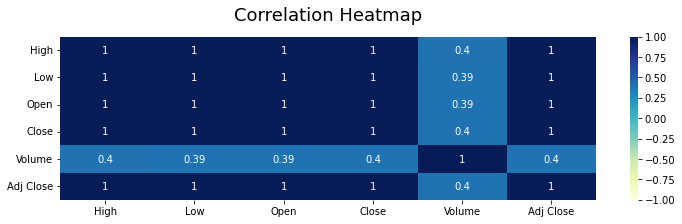

In [16]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(EDPR.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

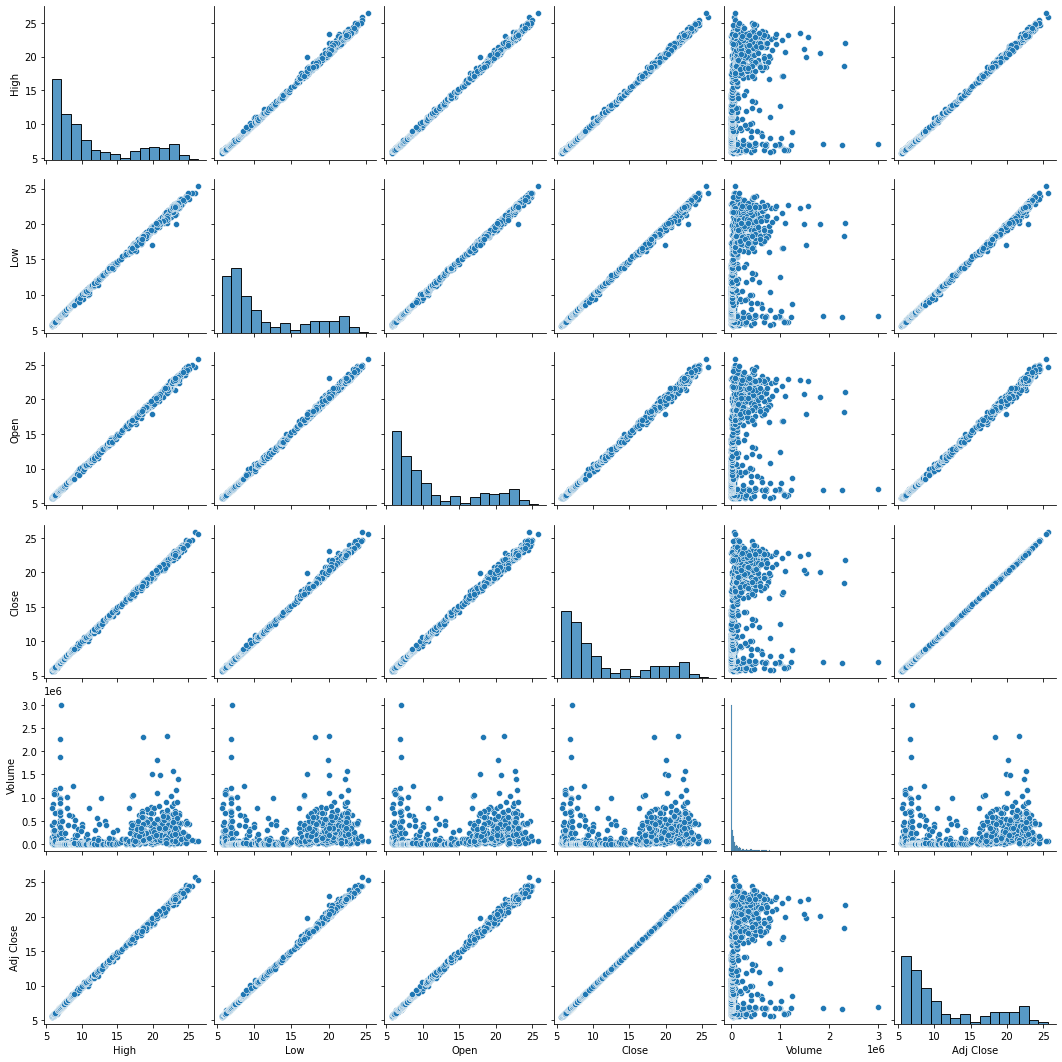

In [17]:
sns.pairplot(EDPR)

<AxesSubplot:>

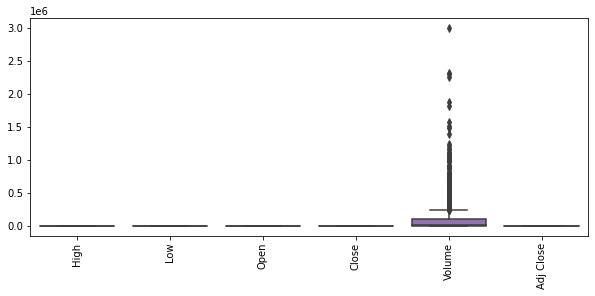

In [18]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=EDPR)

In [19]:
# We selected the main column  for us
close_EDPR= EDPR['Close']

# freq='B' stands for only weekdays
weekdays_EDPR= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need reindex close using all weekdays as the new index.
close_EDPR= close_EDPR.reindex(weekdays_EDPR)

#We filling the Missing values (NaN) with 'forward fill'
close_EDPR = close_EDPR.fillna(method='ffill')
close_EDPR = close_EDPR.dropna()# delete NaNs if there are more.
#we passed the information into Dataframe and rename the columns
close_EDPR = pd.DataFrame(close_EDPR).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_EDPR.tail()

Close
2022-05-09  20.357500
2022-05-10  20.785000
2022-05-11  20.760000
2022-05-12  20.120001
2022-05-13  20.337500

In [20]:
close_EDPR.tail()

Close
2022-05-09  20.357500
2022-05-10  20.785000
2022-05-11  20.760000
2022-05-12  20.120001
2022-05-13  20.337500

In [21]:
close_EDPR.describe()

Close
count  1660.000000
mean     11.399328
std       5.620214
min       5.649900
25%       7.006200
50%       8.722500
75%      15.402500
max      25.900000

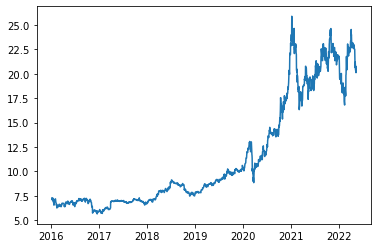

In [22]:
plt.plot(close_EDPR["Close"],label='EDPR Close Price history')

In [23]:
EDPR_df = close_EDPR
EDPR_df 

Close
2016-01-04   7.135100
2016-01-05   7.300600
2016-01-06   7.215130
2016-01-07   7.219500
2016-01-08   7.196500
...               ...
2022-05-09  20.357500
2022-05-10  20.785000
2022-05-11  20.760000
2022-05-12  20.120001
2022-05-13  20.337500

[1660 rows x 1 columns]

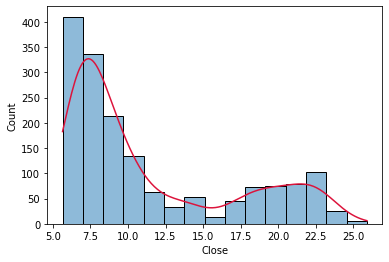

In [24]:
ax= sns.histplot(EDPR_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [25]:
EDPR_df.to_csv("EDPR_df.csv")

In [26]:
EDPR_df= pd.read_csv('EDPR_df.csv')#We decided works with a CSV for modeling 
EDPR_df.tail()

Unnamed: 0      Close
1655  2022-05-09  20.357500
1656  2022-05-10  20.785000
1657  2022-05-11  20.760000
1658  2022-05-12  20.120001
1659  2022-05-13  20.337500

In [27]:
#Renaming column Unnamed: 0
list(EDPR_df.columns)

EDPR_df = EDPR_df.rename(columns={'Unnamed: 0': 'Date'})

In [28]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1660 non-null   object 
 1   Close   1660 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.1+ KB


In [29]:
EDPR_df= EDPR_df[['Date', 'Close']]
EDPR_df

Date      Close
0     2016-01-04   7.135100
1     2016-01-05   7.300600
2     2016-01-06   7.215130
3     2016-01-07   7.219500
4     2016-01-08   7.196500
...          ...        ...
1655  2022-05-09  20.357500
1656  2022-05-10  20.785000
1657  2022-05-11  20.760000
1658  2022-05-12  20.120001
1659  2022-05-13  20.337500

[1660 rows x 2 columns]

In [30]:
#we define date and we reindex the dataframe
EDPR_df.index = EDPR_df["Date"]

In [31]:
EDPR_df= EDPR_df.sort_index(ascending=True,axis=0)
df_1= pd.DataFrame(index=range(0,len(EDPR_df)),columns=['Date','Close'])
for i in range(0,len(df_1)):
    df_1["Close"][i]=EDPR_df["Close"][i]
    df_1["Date"][i]=EDPR_df['Date'][i]

EDPR_df = df_1
#convert  the Date data to datatime Type
EDPR_df["Date"] = pd.to_datetime(EDPR_df.Date, format="%Y/%m/%d")
EDPR_df.tail()

Date      Close
1655 2022-05-09    20.3575
1656 2022-05-10     20.785
1657 2022-05-11      20.76
1658 2022-05-12  20.120001
1659 2022-05-13    20.3375

In [32]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1660 non-null   datetime64[ns]
 1   Close   1660 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 26.1+ KB


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [33]:
VWS.describe()

High          Low         Open        Close        Volume  \
count  1609.000000  1609.000000  1609.000000  1609.000000  1.609000e+03   
mean    422.078218   412.185092   417.125045   417.020904  2.122008e+05   
std     156.126013   153.946074   154.938123   154.987578  3.937776e+05   
min     115.360001   113.000000   113.059998   115.260002  0.000000e+00   
25%     252.000000   245.000000   249.600006   248.474838  3.171100e+04   
50%     445.896423   437.000000   441.000000   441.149994  7.779800e+04   
75%     553.799988   542.910767   549.000000   548.245789  2.017400e+05   
max     730.728699   719.700012   724.500000   719.700012  4.502410e+06   

         Adj Close  
count  1609.000000  
mean    411.117378  
std     151.862253  
min     114.276527  
25%     247.579269  
50%     432.777863  
75%     539.504578  
max     711.659607

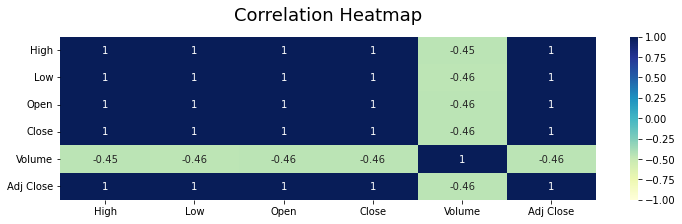

In [34]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(VWS.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

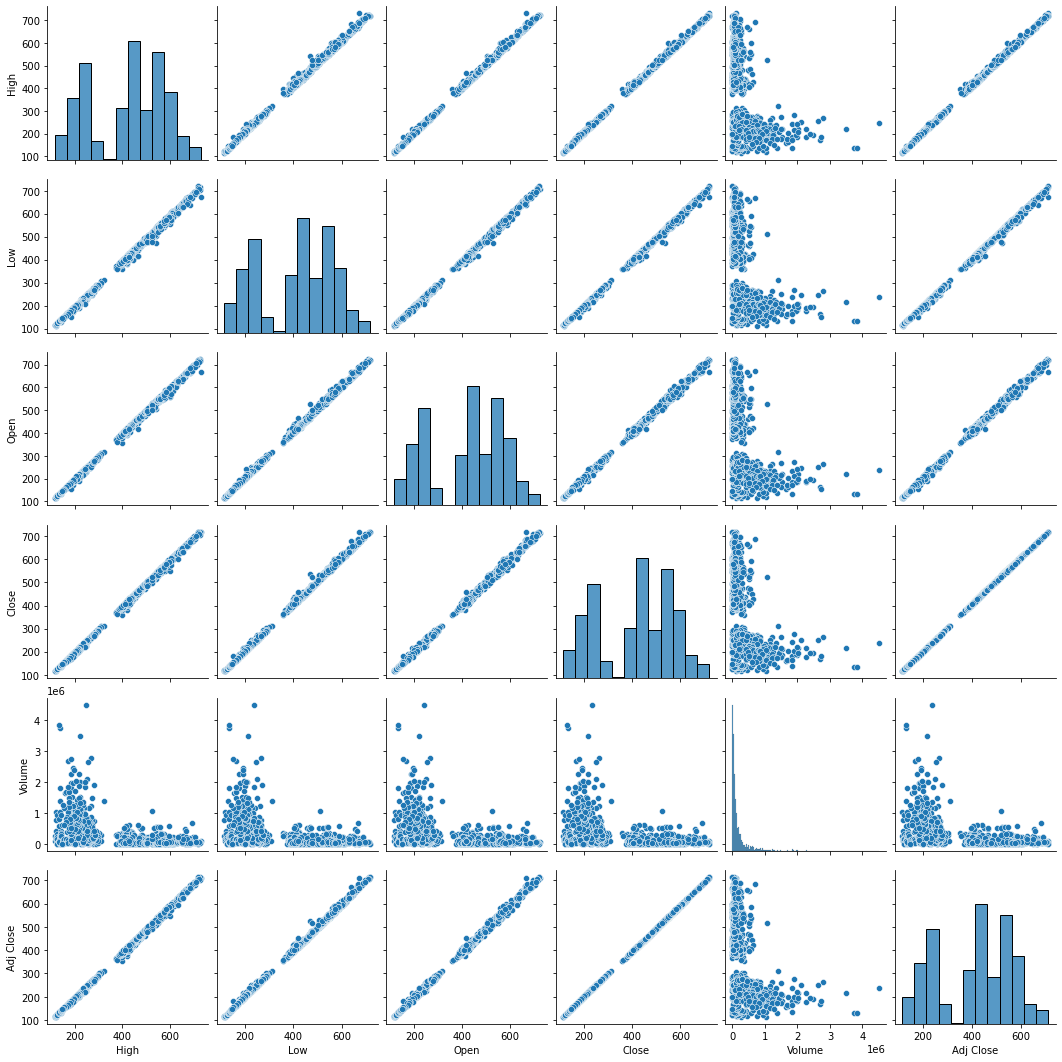

In [35]:
sns.pairplot(VWS)

<AxesSubplot:>

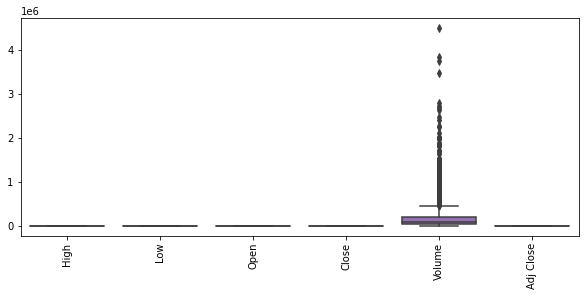

In [36]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=VWS)

In [37]:
# We selected the main column  for us
close_VWS= VWS['Close']

# freq='B' stands for only weekdays
weekdays_VWS= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need to align the existing prices, so we reindex close using all weekdays as the new index.
close_VWS= close_VWS.reindex(weekdays_VWS)

#We filling the Missing values (NaN) with 'forward fill'
close_VWS = close_VWS.fillna(method='ffill')
#we passed the information into Dataframe and rename the columns
close_VWS= pd.DataFrame(close_VWS).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_VWS.tail()

Close
2022-05-09  154.350006
2022-05-10  152.490005
2022-05-11  155.229996
2022-05-12  147.080002
2022-05-13  147.080002

In [38]:
close_VWS.tail()

Close
2022-05-09  154.350006
2022-05-10  152.490005
2022-05-11  155.229996
2022-05-12  147.080002
2022-05-13  147.080002

In [39]:
close_VWS.describe()

Close
count  1660.000000
mean    417.078945
std     155.091213
min     115.260002
25%     248.778744
50%     441.096542
75%     548.324997
max     719.700012

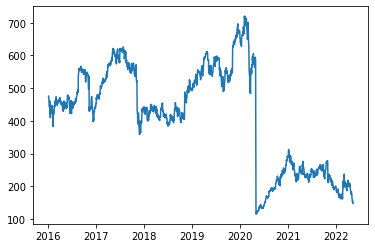

In [40]:
plt.plot(close_VWS["Close"],label='VWS Close Price history')

In [41]:
VWS_df = close_VWS

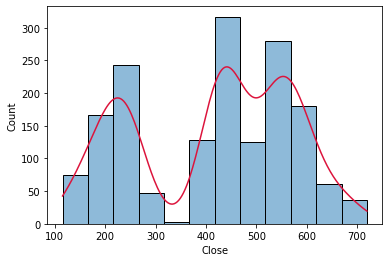

In [42]:
ax= sns.histplot(VWS_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [43]:
VWS_df.to_csv("VWS_df.csv")

In [44]:
VWS_df= pd.read_csv('VWS_df.csv')#We decided works with a CSV for modeling 
VWS_df.head()

Unnamed: 0       Close
0  2016-01-04  475.468903
1  2016-01-05  475.200012
2  2016-01-06  468.399994
3  2016-01-07  460.307312
4  2016-01-08  458.308014

In [45]:
#Renaming column Unnamed: 0
list(VWS_df.columns)

VWS_df = VWS_df.rename(columns={'Unnamed: 0': 'Date'})

In [46]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1660 non-null   object 
 1   Close   1660 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.1+ KB


In [47]:
VWS_df= VWS_df[['Date', 'Close']]
VWS_df

Date       Close
0     2016-01-04  475.468903
1     2016-01-05  475.200012
2     2016-01-06  468.399994
3     2016-01-07  460.307312
4     2016-01-08  458.308014
...          ...         ...
1655  2022-05-09  154.350006
1656  2022-05-10  152.490005
1657  2022-05-11  155.229996
1658  2022-05-12  147.080002
1659  2022-05-13  147.080002

[1660 rows x 2 columns]

In [48]:
#we define  the dataframe index value as the data column
VWS_df.index = VWS_df["Date"]

In [49]:
VWS_df= VWS_df.sort_index(ascending=True,axis=0)
df_2 = pd.DataFrame(index=range(0,len(VWS_df)),columns=['Date','Close'])
for i in range(0,len(df_2)):
    df_2["Date"][i]=VWS_df['Date'][i]
    df_2["Close"][i]=VWS_df["Close"][i]

VWS_df = df_2
#convert  the Date data to datatime Type
VWS_df["Date"] = pd.to_datetime(VWS_df.Date, format="%Y/%m/%d")
VWS_df.head()

Date       Close
0 2016-01-04  475.468903
1 2016-01-05  475.200012
2 2016-01-06  468.399994
3 2016-01-07  460.307312
4 2016-01-08  458.308014

In [50]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1660 non-null   datetime64[ns]
 1   Close   1660 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 26.1+ KB


In [51]:
VWS_df = VWS_df.rename(columns={'Close': 'VWS'})
Stocks_df = VWS_df

In [52]:
Stocks_df

Date         VWS
0    2016-01-04  475.468903
1    2016-01-05  475.200012
2    2016-01-06  468.399994
3    2016-01-07  460.307312
4    2016-01-08  458.308014
...         ...         ...
1655 2022-05-09  154.350006
1656 2022-05-10  152.490005
1657 2022-05-11  155.229996
1658 2022-05-12  147.080002
1659 2022-05-13  147.080002

[1660 rows x 2 columns]

In [53]:
Stocks_df["EDPR"] = EDPR_df["Close"]

In [54]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1660 non-null   datetime64[ns]
 1   VWS     1660 non-null   object        
 2   EDPR    1660 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 39.0+ KB


In [55]:
Stocks_df

Date         VWS       EDPR
0    2016-01-04  475.468903     7.1351
1    2016-01-05  475.200012     7.3006
2    2016-01-06  468.399994    7.21513
3    2016-01-07  460.307312     7.2195
4    2016-01-08  458.308014     7.1965
...         ...         ...        ...
1655 2022-05-09  154.350006    20.3575
1656 2022-05-10  152.490005     20.785
1657 2022-05-11  155.229996      20.76
1658 2022-05-12  147.080002  20.120001
1659 2022-05-13  147.080002    20.3375

[1660 rows x 3 columns]

In [56]:
#we define  the dataframe'd index valu as the data column
Stocks_df.index = Stocks_df["Date"]

In [57]:
Stocks_df= Stocks_df.sort_index(ascending=True,axis=0)
df_3 = pd.DataFrame(index=range(0,len(Stocks_df)),columns=['Date','EDPR', 'VWS'])
for i in range(0,len(df_3)):
    df_3["Date"][i]=Stocks_df['Date'][i]
    df_3["EDPR"][i]=Stocks_df["EDPR"][i]
    df_3["VWS"][i]=Stocks_df["VWS"][i]

Stocks_df = df_3
#convert  the Date data to datatime Type
Stocks_df["Date"] = pd.to_datetime(Stocks_df.Date, format="%Y/%m/%d")
Stocks_df.tail()

Date       EDPR         VWS
1655 2022-05-09    20.3575  154.350006
1656 2022-05-10     20.785  152.490005
1657 2022-05-11      20.76  155.229996
1658 2022-05-12  20.120001  147.080002
1659 2022-05-13    20.3375  147.080002

In [58]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1660 non-null   datetime64[ns]
 1   EDPR    1660 non-null   object        
 2   VWS     1660 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 39.0+ KB


In [59]:
Stocks_df.tail()

Date       EDPR         VWS
1655 2022-05-09    20.3575  154.350006
1656 2022-05-10     20.785  152.490005
1657 2022-05-11      20.76  155.229996
1658 2022-05-12  20.120001  147.080002
1659 2022-05-13    20.3375  147.080002

In [60]:
import plotly.express as px
graphic = px.line(title = 'Stock price history')
for i in Stocks_df.columns[1:]:
  graphic.add_scatter(x = Stocks_df['Date'], y = Stocks_df[i], name = i)
graphic.show()

In [61]:
#Splinting into X/y
X = Stocks_df.drop('Date', axis=1)
y= Stocks_df['Date']
Stocks_normalized = X
Stocks_normalized.head()

EDPR         VWS
0   7.1351  475.468903
1   7.3006  475.200012
2  7.21513  468.399994
3   7.2195  460.307312
4   7.1965  458.308014

In [62]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(Stocks_normalized)
Stocks = scaler.transform(Stocks_normalized)
DF= pd.DataFrame(Stocks)
DF.rename(columns= {0: 'EDPR', 1: 'VWS'}, inplace=True)
X = DF
X['Date'] = y
X.set_index(X.columns[-1], inplace=True)
X.reset_index(inplace=True)
Stock_norm = X

In [63]:
Stock_norm.head()

Date      EDPR       VWS
0 2016-01-04  0.073343  0.595938
1 2016-01-05  0.081516  0.595493
2 2016-01-06  0.077295  0.584243
3 2016-01-07  0.077511  0.570855
4 2016-01-08  0.076375  0.567547

In [64]:
Stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1660 non-null   datetime64[ns]
 1   EDPR    1660 non-null   float64       
 2   VWS     1660 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 39.0 KB


In [65]:
#Visualizing the graphic with the normalized data

graphic_norm = px.line(title = 'Stock price history')
for i in Stock_norm.columns[1:]:
  graphic_norm.add_scatter(x = Stock_norm['Date'], y = Stock_norm[i], name = i)
graphic_norm.show()

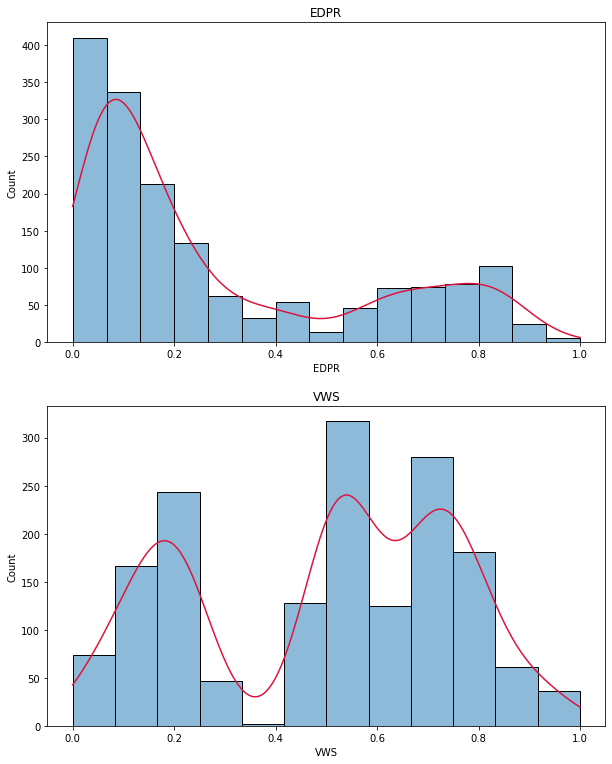

In [66]:
import numpy as np
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(Stock_norm.columns)):
    plt.subplot(3, 1, i + 1)
    ax=sns.histplot(Stock_norm[Stock_norm.columns[i]], kde = True)
    ax.lines[0].set_color('crimson')
    plt.title(Stock_norm.columns[i])

### II.1- ETS-Decomposition


ETS-Decomposition is a method that allows us to visualize the data after a decomposition of time series into three distinct components: trend, seasonality, and noise.

* Additive decomposition: yt = St + Tt + Rt
* Multiplicative decomposition: yt = St * Tt * Rt

where, 
- S represents the Seasonal variation
- T encodes Trend plus Cycle
- R describes the Residual or the Error component.
Daitan (2019)

In [67]:
# graphs to show seasonal_decompose
def ETS_Decomposition (timeseries):
    decomposition = sm.tsa.seasonal_decompose(timeseries, model='mul',freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

#### A.- EDP Renováveis (0ML1.IL)

In [68]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
EDPR= pd.read_csv('EDPR.csv',index_col='Date',parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
EDPR.head(2)

High     Low    Open   Close  Volume  Adj Close
Date                                                         
2016-01-04  7.1351  7.1351  7.1351  7.1351     0.0   6.866567
2016-01-05  7.3006  7.3006  7.3006  7.3006   150.0   7.025838

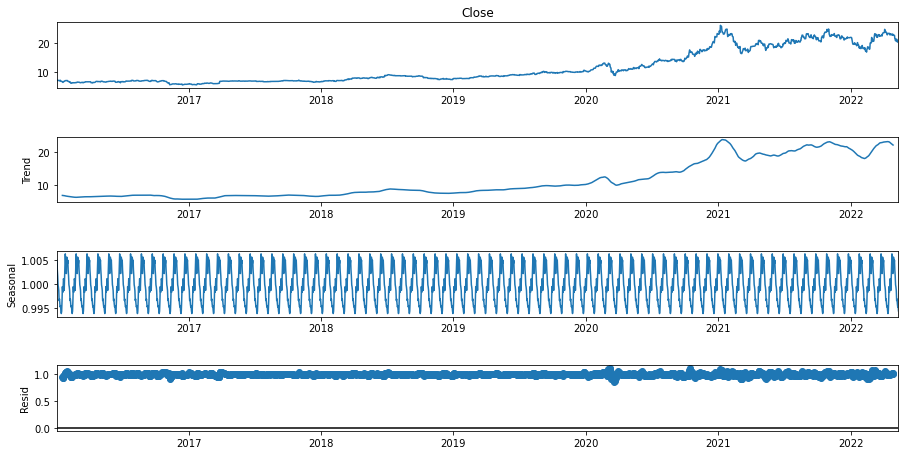

In [69]:
ETS_Decomposition (EDPR['Close'])

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [70]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
VWS= pd.read_csv('VWS.csv',index_col='Date', parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
VWS.head(2)

High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-01-04  483.998474  475.468903  473.500000  475.468903  2528.0  464.095398
2016-01-05  476.799988  465.432190  479.899994  475.200012  1738.0  463.832947

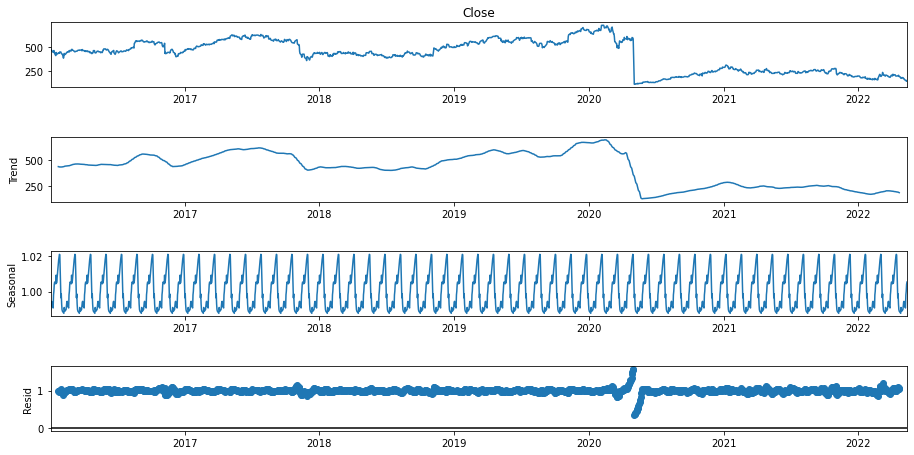

In [71]:
ETS_Decomposition (VWS['Close'])

### II.2.- Augmented Dickey–Fuller test

The Augmented Dickey-Fuller test helps us to detect if a time series is or not “stationary”. Stationary means that the data has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time. It is ‘stationarize’ the time series as part of the process of fitting a model.Zach (2021) 

In [72]:
def ADFuller(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value, 'not' if value < result[0] else '', 100-int(key[:-1])))
        

In [73]:
### Plot for testing Stationarity with mean and standard deviation
def plot_stationarity(timeseries, title):
    
    #Determing rolling statistics
    mean = pd.Series(timeseries).rolling(30).mean()#rolling a month
    std = pd.Series(timeseries).rolling(30).std()#rolling a month
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(mean, label='rolling mean');
    ax.plot(std, label='rolling std');
    ax.legend()

#### A.- EDP Renováveis (0ML1.IL)

In [74]:
ADFuller(EDPR['Close'])

ADF Statistic: -0.730385
p-value: 0.838721
Critical Values:
	1%: -3.4331889393794963 - The data is not stationary with 99% confidence
	5%: -2.8627941819642038 - The data is not stationary with 95% confidence
	10%: -2.5674376574703497 - The data is not stationary with 90% confidence


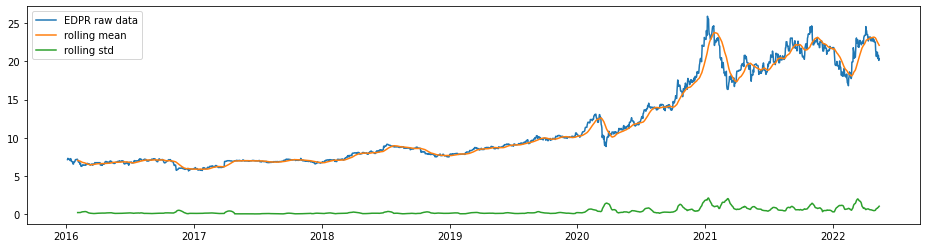

In [75]:
plot_stationarity(EDPR['Close'],'EDPR raw data')

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [76]:
ADFuller(VWS['Close'])

ADF Statistic: -1.556420
p-value: 0.505440
Critical Values:
	1%: -3.4342978282123258 - The data is not stationary with 99% confidence
	5%: -2.8632837412222885 - The data is not stationary with 95% confidence
	10%: -2.567698326213784 - The data is not stationary with 90% confidence


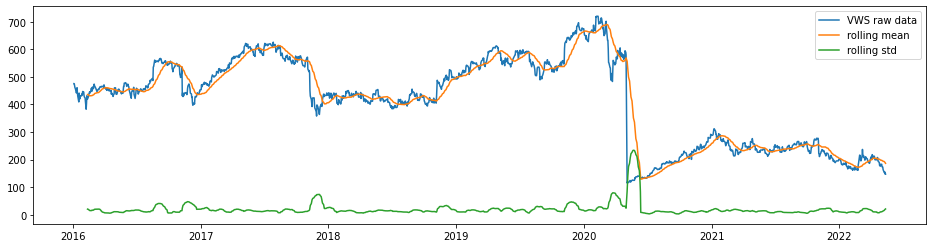

In [77]:
plot_stationarity(VWS['Close'],'VWS raw data')

### II.3.- Make the Data Stationary

### II.3.1.- Detrending: 

- Removing the underlying trend in the time series.

#### A.- EDP Renováveis (0ML1.IL)

ADF Statistic: -10.995517
p-value: 0.000000
Critical Values:
	1%: -3.4332062996751413 - The data is  stationary with 99% confidence
	5%: -2.862801847694968 - The data is  stationary with 95% confidence
	10%: -2.5674417389036606 - The data is  stationary with 90% confidence


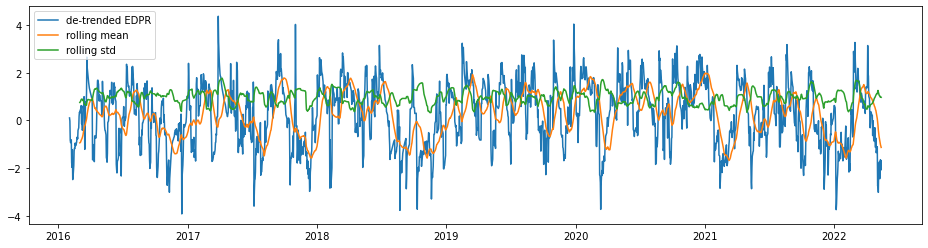

In [78]:
EDPR['Detrend']=  (EDPR['Close'] - EDPR['Close'].rolling(30).mean())/EDPR['Close'].rolling(30).std().dropna()
plot_stationarity(EDPR['Detrend'],'de-trended EDPR')
ADFuller(EDPR['Detrend'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -9.047583
p-value: 0.000000
Critical Values:
	1%: -3.4343681767217062 - The data is  stationary with 99% confidence
	5%: -2.863314793016078 - The data is  stationary with 95% confidence
	10%: -2.5677148609281493 - The data is  stationary with 90% confidence


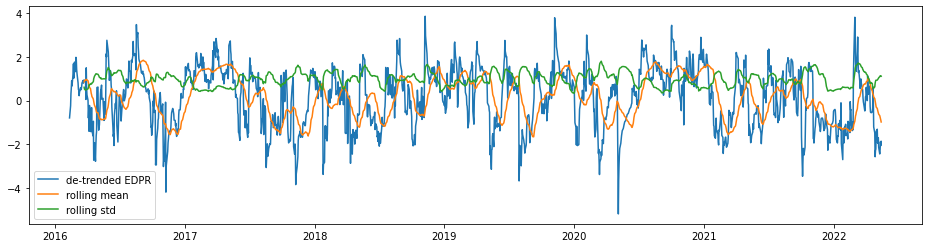

In [79]:
VWS['Detrend'] =  (VWS['Close'] - VWS['Close'].rolling(30).mean())/VWS['Close'].rolling(30).std().dropna()
plot_stationarity(VWS['Detrend'],'de-trended EDPR')
ADFuller(VWS['Detrend'].dropna(inplace=False))

### II.3.2.-  Differencing

#### A.- EDP Renováveis (0ML1.IL)

- Removing the underlying seasonal or cyclical patterns in the time series. 

In [80]:
EDPR['Differencing']=  EDPR['Close'] - EDPR['Close'].shift(1).dropna()

ADF Statistic: -10.936293
p-value: 0.000000
Critical Values:
	1%: -3.4331889393794963 - The data is  stationary with 99% confidence
	5%: -2.8627941819642038 - The data is  stationary with 95% confidence
	10%: -2.5674376574703497 - The data is  stationary with 90% confidence


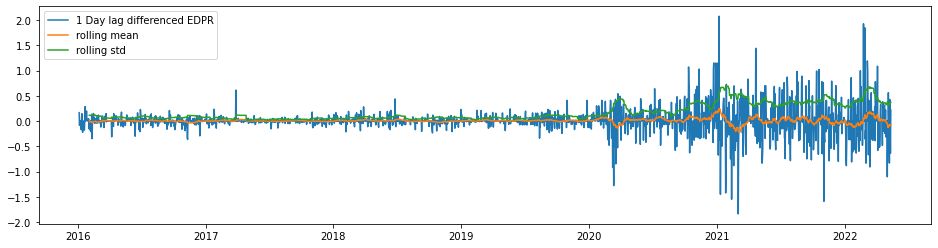

In [81]:
plot_stationarity(EDPR['Differencing'], '1 Day lag differenced EDPR')
ADFuller(EDPR['Differencing'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -40.052735
p-value: 0.000000
Critical Values:
	1%: -3.434300212992577 - The data is  stationary with 99% confidence
	5%: -2.863284793874921 - The data is  stationary with 95% confidence
	10%: -2.567698886736967 - The data is  stationary with 90% confidence


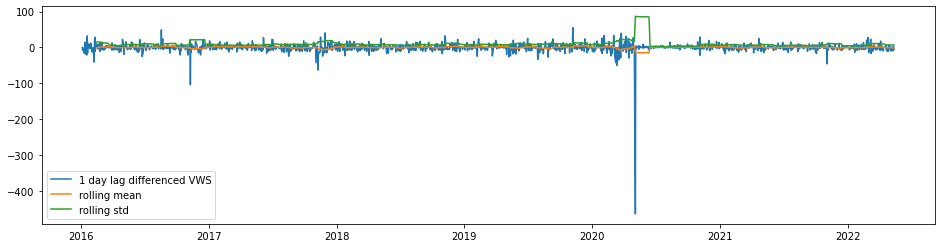

In [82]:
VWS['Differencing'] =  VWS['Close'] - VWS['Close'].shift(1).dropna()

plot_stationarity(VWS['Differencing'], '1 day lag differenced VWS')
ADFuller(VWS['Differencing'].dropna(inplace=False))

### II.3.3.-  Detrending + Differencing

- Removing the underlying trend and the seasonal or cyclical patterns in the time series.

#### A.- EDP Renováveis (0ML1.IL)

ADF Statistic: -15.670301
p-value: 0.000000
Critical Values:
	1%: -3.433226401825008 - The data is  stationary with 99% confidence
	5%: -2.8628107240820135 - The data is  stationary with 95% confidence
	10%: -2.567446464930921 - The data is  stationary with 90% confidence


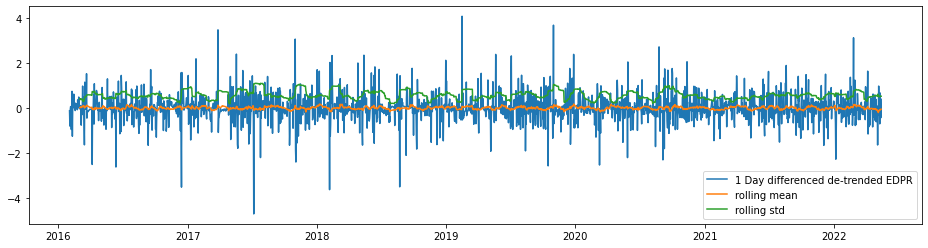

In [83]:
EDPR['Detrend_Diff']=  EDPR['Detrend']- EDPR['Detrend'].shift(1).dropna()
plot_stationarity(EDPR['Detrend_Diff'],'1 Day differenced de-trended EDPR')
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -17.666562
p-value: 0.000000
Critical Values:
	1%: -3.4343880265995215 - The data is  stationary with 99% confidence
	5%: -2.8633235546096194 - The data is  stationary with 95% confidence
	10%: -2.56771952639493 - The data is  stationary with 90% confidence


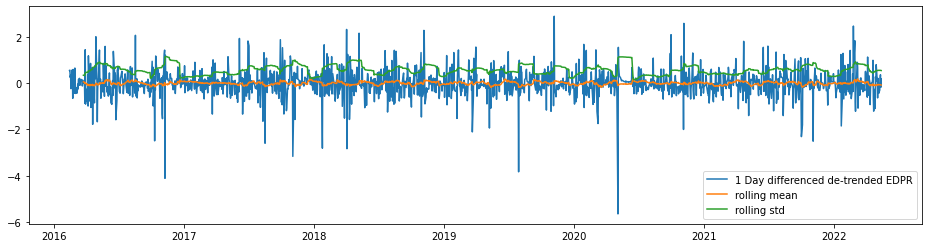

In [84]:
VWS['Detrend_Diff'] =  VWS['Detrend']- VWS['Detrend'].shift(1)

plot_stationarity(VWS['Detrend_Diff'],'1 Day differenced de-trended EDPR')
ADFuller(VWS['Detrend_Diff'].dropna(inplace=False))

### II.4- Identifying AR and MA orders by ACF and PACF plots

Plotting  ACF and PACF help us to undertand how to choose the best MA(q) and AR(p) values:

- ACF= Describes how well the present value of the series is related with its past values 
- PACF= It finds correlation of the residuals

Blue bars on the plots are the error bands, everything in this area is not statistically significant.  In linear regression models performs best when the predictors are not correlated and are independent of each other. 



In [85]:
# plot the data with 30 lags, one Month

### Plot for testing Stationarity with mean and standard deviation
def plot_ACF_PACF(timeseries, title):
    plt.figure(figsize=(12,8))
    layout = (2, 2)
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    timeseries.plot(ax = ax_xt)
    ax_xt.set_title(title)
    plot_acf(timeseries[1:], lags = 50, ax = ax_acf) # first value of diff is NaN
    plot_pacf(timeseries[1:], lags = 50, ax = ax_pacf) # first value of diff is NaN
    plt.tight_layout()

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

In [86]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
def plot_QQ(timeseries):
    x = sm.qqplot(timeseries, line= 's')

#### A.- EDP Renováveis (0ML1.IL)

ADF Statistic: -15.670301
p-value: 0.000000
Critical Values:
	1%: -3.433226401825008 - The data is  stationary with 99% confidence
	5%: -2.8628107240820135 - The data is  stationary with 95% confidence
	10%: -2.567446464930921 - The data is  stationary with 90% confidence


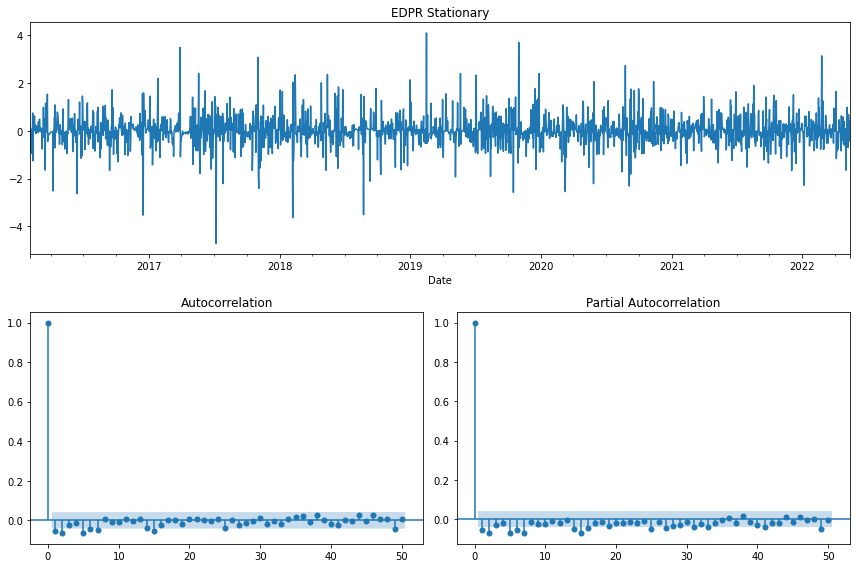

In [87]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'EDPR Stationary')

It looks like the ACF is lagged by 7 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling.

<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


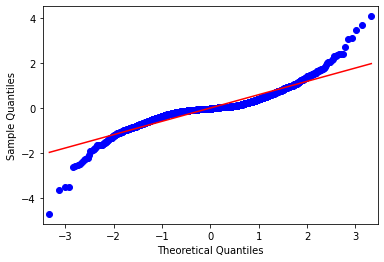

In [88]:
plot_QQ(EDPR['Detrend_Diff'].dropna())

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -15.670301
p-value: 0.000000
Critical Values:
	1%: -3.433226401825008 - The data is  stationary with 99% confidence
	5%: -2.8628107240820135 - The data is  stationary with 95% confidence
	10%: -2.567446464930921 - The data is  stationary with 90% confidence


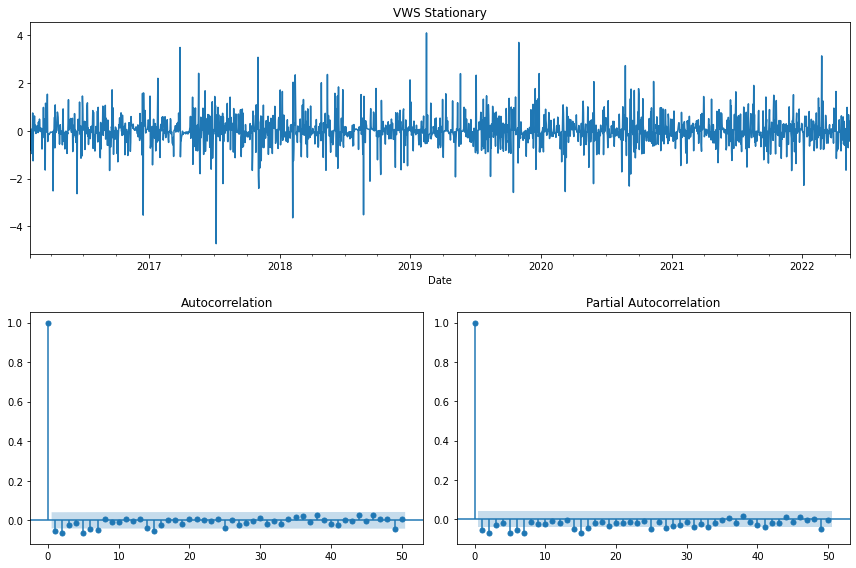

In [89]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'VWS Stationary')

It looks like the ACF is lagged by 3 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling. 
<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


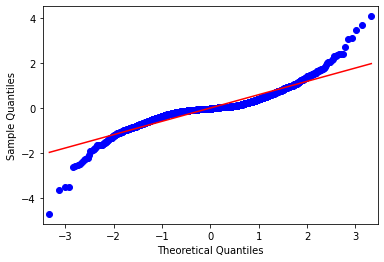

In [90]:
plot_QQ(EDPR['Detrend_Diff'].dropna(inplace=False))

### III.-Modelling

#### A.- EDP Renováveis (0ML1.IL)

In [91]:
from sklearn.model_selection import TimeSeriesSplit

In [92]:
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(EDPR)

#Find out no of observations in train and test sets
i=0
for train_A, test_A in tscv.split(EDPR):
    i=i+1
    print ("Shape EDPR train%s=%s" % (i, len(train_A)))
    print ("Shape EDPR test%s=%s" % (i, len(test_A)))

Shape EDPR train1=582
Shape EDPR test1=580
Shape EDPR train2=1162
Shape EDPR test2=580
Shape EDPR train3=1742
Shape EDPR test3=580


In [93]:
#Splitting according to the above description
trainA1, testA1 = EDPR.iloc[:500, 0], EDPR.iloc[500:890, 0]
trainA2, testA2 = EDPR.iloc[:890, 0], EDPR.iloc[890:1080, 0]
trainA3, testA3 = EDPR.iloc[:1080, 0], EDPR.iloc[1080:1240, 0]

In [94]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_A = EDPR[:int(0.85 * (len(EDPR)))]
test_A  = EDPR[int(0.85 * (len(EDPR))):]
train_A.shape, test_A.shape

((1973, 9), (349, 9))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [95]:
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(VWS)

#Find out no of observations in train and test sets
i=0
for train_B, test_B in tscv.split(VWS):
    i=i+1
    print ("VWS train%s=%s" % (i, len(train_B)))
    print ("VWS test%s=%s" % (i, len(test_B)))

VWS train1=415
VWS test1=415
VWS train2=830
VWS test2=415
VWS train3=1245
VWS test3=415


In [96]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_B = VWS[:int(0.85 * (len(VWS)))]
test_B  = VWS[int(0.85 * (len(VWS))):]

train_B.shape, test_B.shape

((1411, 9), (249, 9))

In [97]:
def plot_models(timeserie, model, title):
    f, axarr = plt.subplots(1, sharex = True)
    f.set_size_inches(12, 6)
    timeserie.iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
    model.iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
    axarr.set_title(title)
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Closing price')

### III.1.- Moving Averages (MA)

-Process where the present value of series is defined as a linear combination of past errors.


In [98]:
w= 20

#### A.- EDP Renováveis (0ML1.IL)

In [99]:
#create moving average by applying a mean function to a rolling window.
EDPR['MA-RW'] = EDPR['Close'].rolling(window=w).mean()
#EDPR.head()

In [100]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
EDPR['MA_EWM'] = EDPR['Close'].ewm(span=w,adjust=False).mean()
#EDPR.head()

In [101]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
warnings.filterwarnings('ignore') 
span = w
alpha = 2/(span+1)
EDPR['MA_SES']=SimpleExpSmoothing(EDPR['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues


##### Validating the Forecast

In [102]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = SimpleExpSmoothing(EDPR['Close']).fit()
pred1 = model1.predict(start=start , end=end)

In [103]:
# Create a dataframe to store r2 score
MA_SES_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_EDPR['Model'] = 'MA_SES'
MA_SES_EDPR.set_index(['Model'], inplace=True)
MA_SES_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_SES_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_SES_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_SES_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_SES_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES  0.940625             0.262672            0.164499   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                 0.405584                        1.251916

In [104]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
EDPR['MA_Holt-Winters'] = ExponentialSmoothing(EDPR['Close'], trend='add').fit().fittedvalues



##### Validating the Forecast

In [105]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = ExponentialSmoothing(EDPR['Close'], seasonal='add',trend='add', seasonal_periods=12).fit()
pred1 = model1.predict(start=start , end=end)

In [106]:
# Create a dataframe to store r2 score
MA_HoltWinters_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_EDPR['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_EDPR.set_index(['Model'], inplace=True)
MA_HoltWinters_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_HoltWinters_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_HoltWinters_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters  0.941345             0.265145            0.162505   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                 0.403119                        1.264147

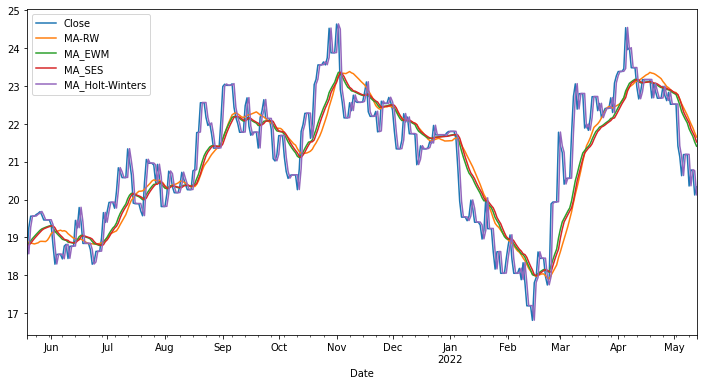

In [107]:
#Plotting the accuracy of the MA
EDPR[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [108]:
#create moving average by applying a mean function to a rolling window.
VWS['MA-RW'] = VWS['Close'].rolling(window=w).mean()
#VWS.head()

In [109]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
VWS['MA_EWM'] = VWS['Close'].ewm(span=w,adjust=False).mean()
#VWS.head()

In [110]:
warnings.filterwarnings('ignore') 
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
span = w
alpha = 2/(span+1)
VWS.asfreq(freq='b')
VWS['MA_SES']=SimpleExpSmoothing(VWS['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues

##### Validating the Forecast

In [111]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = ExponentialSmoothing(VWS['Close'], seasonal='mul',trend='add', seasonal_periods=12).fit()
pred2 = model2.predict(start=start , end=end)

In [112]:
# Create a dataframe to store r2 score
MA_SES_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_VWS['Model'] = 'MA_SES'
MA_SES_VWS.set_index(['Model'], inplace=True)
MA_SES_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_SES_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_SES_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_SES_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_SES_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES  0.936332             5.692954           61.914973   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                 7.868607                        2.639422

In [113]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
VWS['MA_Holt-Winters'] = ExponentialSmoothing(VWS['Close'], trend='add').fit().fittedvalues

In [114]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = ExponentialSmoothing(VWS['Close'], seasonal='mul',trend='add', seasonal_periods=12).fit()
pred2 = model2.predict(start=start , end=end)

In [115]:
# Create a dataframe to store r2 score
MA_HoltWinters_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_VWS['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_VWS.set_index(['Model'], inplace=True)
MA_HoltWinters_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_HoltWinters_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_HoltWinters_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters  0.936332             5.692954           61.914973   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                 7.868607                        2.639422

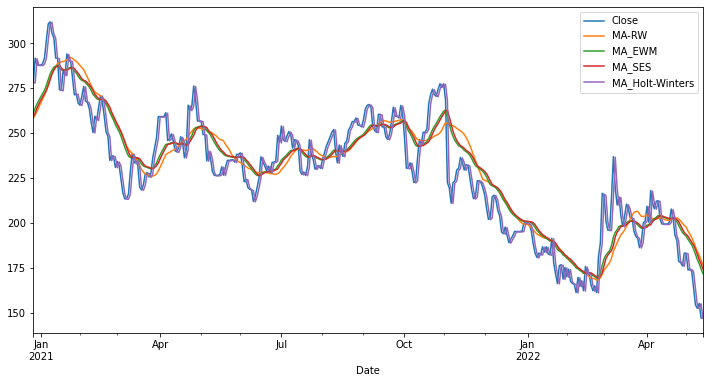

In [116]:
#Plotting the accuracy of the MA
VWS[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### III.2.- ARMA

#### A.- EDP Renováveis (0ML1.IL)

Month: 20 working days

In [117]:
arma_EDPR = smtsa.ARMA(EDPR['Close'].tolist(), order=(1, 0)).fit(maxlag=20, method='mle', trend='nc') 

In [118]:
EDPR['ARMA']= arma_EDPR.predict()
arma_EDPR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2322
Model:                     ARMA(1, 0)   Log Likelihood                  95.123
Method:                           mle   S.D. of innovations              0.232
Date:                Sun, 15 May 2022   AIC                           -186.247
Time:                        14:41:54   BIC                           -174.746
Sample:                             0   HQIC                          -182.056
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   6272.517      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

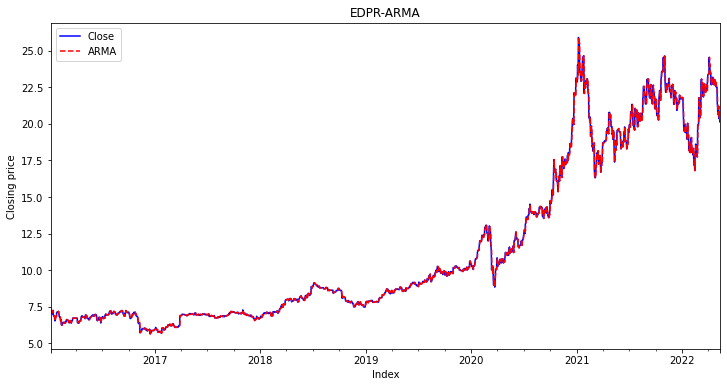

In [119]:
plot_models(EDPR['Close'], EDPR['ARMA'], 'EDPR-ARMA')

##### Validating the Forecast

In [120]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = arma_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels')

# Create a dataframe to store r2 score
R_arma_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_EDPR['Model'] = 'ARMA'
R_arma_EDPR.set_index(['Model'], inplace=True)
R_arma_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_arma_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_arma_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_arma_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_arma_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARMA   0.940626              0.26342            0.164498   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                  0.405583                        1.255356

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [121]:
VWS=VWS.dropna()

In [122]:
arma_VWS = smtsa.ARMA(VWS['Close'].tolist(), order=(12, 0)).fit(maxlag=20, method='mle', trend='c') 

In [123]:
VWS['ARMA']= arma_VWS.predict()
arma_VWS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1630
Model:                    ARMA(12, 0)   Log Likelihood               -6690.236
Method:                           mle   S.D. of innovations             14.644
Date:                Sun, 15 May 2022   AIC                          13408.471
Time:                        14:42:13   BIC                          13484.020
Sample:                             0   HQIC                         13436.499
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.9067     78.657      4.919      0.000     232.741     541.072
ar.L1.y        1.0183      0.025     41.157      0.000       0.970       1.067
ar.L2.y       -0.0140      0.035     -0.397      0.692      -0.083       0.055
ar.L3.y        0.0045      0.035      0.129      0.898      -0.065       0.074
ar.L4.y       -0.0595      0.035     -1.685      0.092      -0.129       0.010
ar.L5.y        0.0462      0.035      1.309      0.191      -0.023       0.115
ar.L6.y       -0.0052      0.035     -0.146      0.884      -0.074       0.064
ar.L7.y        0.0038      0.035      0.107      0.915      -0.065       0.073
ar.L8.y        0.0177      0.035      0.502      0.616      -0.051       0.087
ar.L9.y       -0.0080      0.035     -0.227      0.820      -0.077       0.061
ar.L10.y       0.0014      0.035      0.041      0.967      -0.068       0.071
ar.L11.y      -0.0457      0.035     -1.296      0.195      -0.115       0.023
ar.L12.y       0.0363      0.025      1.469      0.142      -0.012       0.085
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.3482           -0.0000j            1.3482           -0.5000
AR.2            -1.0965           -0.7487j            1.3277           -0.4046
AR.3            -1.0965           +0.7487j            1.3277            0.4046
AR.4            -0.5743           -1.2256j            1.3535           -0.3197
AR.5            -0.5743           +1.2256j            1.3535            0.3197
AR.6             0.2061           -1.3304j            1.3463           -0.2255
AR.7             0.2061           +1.3304j            1.3463            0.2255
AR.8             0.9113           -0.9625j            1.3255           -0.1293
AR.9             0.9113           +0.9625j            1.3255            0.1293
AR.10            1.0041           -0.0000j            1.0041           -0.0000
AR.11            1.3549           -0.3766j            1.4063           -0.0431
AR.12            1.3549           +0.3766j            1.4063            0.0431
------------------------------------------------------------------------------
"""

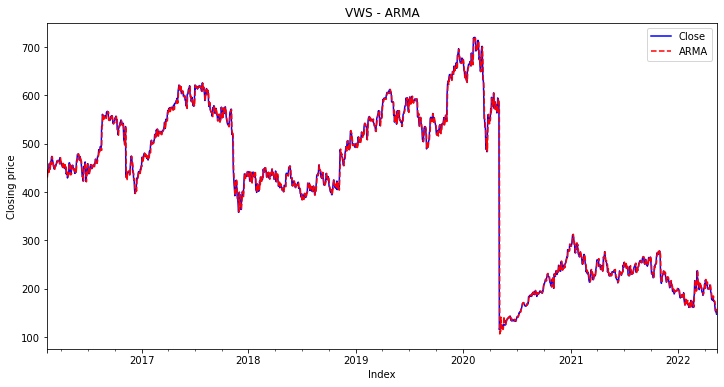

In [124]:
plot_models(VWS['Close'], VWS['ARMA'], 'VWS - ARMA')

##### Validating the Forecast

In [125]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = arma_VWS.predict(start = start, end = end, dynamic = False, typ = 'levels')

In [126]:
# Create a dataframe to store r2 score
R_arma_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_VWS['Model'] = 'ARMA'
R_arma_VWS.set_index(['Model'], inplace=True)
R_arma_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_arma_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_arma_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_arma_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
R_arma_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARMA   0.107261            24.847945          868.163124   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                 29.464608                       11.728323

### III.3.- ARIMA

#### A.- EDP Renováveis (0ML1.IL)

In [127]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(EDPR['Close'].tolist(), order = (2, 0, 1))#best model by pmdarima.auto_arima
# Train the ARIMA model by calling a method fit()
arima_EDPR= arima_obj.fit(disp = 0)
# Display the summary of the trained model
arima_EDPR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2322
Model:                     ARMA(2, 1)   Log Likelihood                 100.365
Method:                       css-mle   S.D. of innovations              0.231
Date:                Sun, 15 May 2022   AIC                           -190.731
Time:                        14:42:21   BIC                           -161.980
Sample:                             0   HQIC                          -180.253
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6218      4.446      2.839      0.005       3.907      21.337
ar.L1.y        0.7259      0.154      4.710      0.000       0.424       1.028
ar.L2.y        0.2731      0.154      1.773      0.076      -0.029       0.575
ma.L1.y        0.3303      0.151      2.183      0.029       0.034       0.627
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           +0.0000j            1.0008            0.0000
AR.2           -3.6584           +0.0000j            3.6584            0.5000
MA.1           -3.0277           +0.0000j            3.0277            0.5000
-----------------------------------------------------------------------------
"""

In [128]:
# Declare the array 'pred' and append the values 
pred = arima_EDPR.fittedvalues.tolist()
#pred = np.append([0], arima_EDPR.fittedvalues.tolist())

In [129]:
# Add a new column 'ARIMA' into dataframe
EDPR['ARIMA'] = pred 

In [130]:
# Residues and fitted values are added and stored into dataframe

diffval = arima_EDPR.resid + arima_EDPR.fittedvalues

#diffval = np.append([0, 0],arima_EDPR.resid + arima_EDPR.fittedvalues)

In [131]:
EDPR['diffval']= diffval

In [132]:
# Display first five records
EDPR.tail()

High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2022-05-09  21.059999  20.066990  20.775000  20.357500  1480535.0  20.357500   
2022-05-10  20.830000  20.070000  20.150000  20.785000   343846.0  20.785000   
2022-05-11  20.930000  20.270000  20.514999  20.760000   822720.0  20.760000   
2022-05-12  20.590000  19.940001  20.347500  20.120001  1814103.0  20.120001   
2022-05-13  20.411119  20.100000  20.125000  20.337500   187324.0  20.337500   

             Detrend  Differencing  Detrend_Diff      MA-RW     MA_EWM  \
Date                                                                     
2022-05-09 -2.448938     -0.832500     -0.707923  22.117125  21.870898   
2022-05-10 -1.780217      0.427500      0.668721  22.003125  21.767479   
2022-05-11 -1.653721     -0.025000      0.126496  21.898125  21.671529   
2022-05-12 -2.087884     -0.639999     -0.434163  21.770125  21.523764   
2022-05-13 -1.701869      0.217499      0.386015  21.653000  21.410787   

               MA_SES  MA_Holt-Winters       ARMA      ARIMA    diffval  
Date                                                                     
2022-05-09  22.030203        21.195689  21.187368  21.188124  20.357500  
2022-05-10  21.870898        20.363188  20.354971  20.302811  20.785000  
2022-05-11  21.767479        20.790688  20.782418  20.819343  20.760000  
2022-05-12  21.671529        20.765688  20.757422  20.739099  20.120001  
2022-05-13  21.523764        20.125689  20.117502  20.082835  20.337500

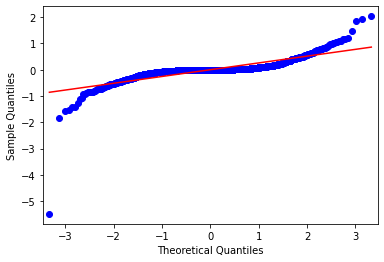

In [133]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_EDPR.resid, line = 's')

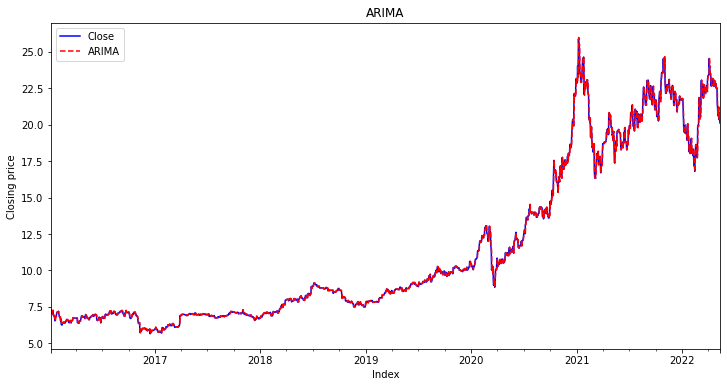

In [134]:
plot_models(EDPR['Close'], EDPR['ARIMA'], 'ARIMA')

Text(0, 0.5, 'Closing')

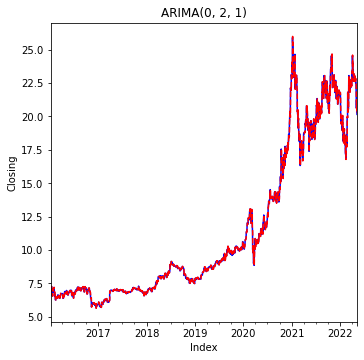

In [135]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
EDPR['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
EDPR['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0, 0.5, 'Forecasted value')

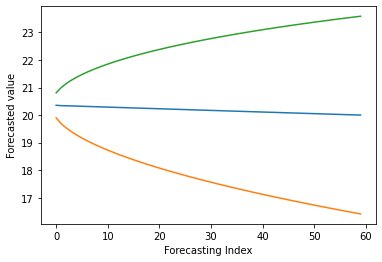

In [136]:
f, err, ci = arima_EDPR.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

##### Validating the Forecast

In [137]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = arima_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels')

In [138]:
# Create a dataframe to store r2 score
R_arima_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arima_EDPR ['Model'] = 'ARIMA'
R_arima_EDPR .set_index(['Model'], inplace=True)
R_arima_EDPR ['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_arima_EDPR ['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_arima_EDPR ['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_arima_EDPR ['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_arima_EDPR 

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARIMA  0.940844             0.266744            0.163892   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARIMA                 0.404836                        1.270736

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [139]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(VWS['Close'].tolist(), order = (1,0, 1))#(p,d,q)
#best model by pmdarima.auto_arima 0.1.0/0.01score
#by hand 1.0.1/ 0.11score
# Train the ARIMA model by calling a method fit()
arima_VWS= arima_obj.fit(disp = -1)
# Display the summary of the trained model
arima_VWS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1630
Model:                     ARMA(1, 1)   Log Likelihood               -6693.669
Method:                       css-mle   S.D. of innovations             14.675
Date:                Sun, 15 May 2022   AIC                          13395.339
Time:                        14:42:22   BIC                          13416.924
Sample:                             0   HQIC                         13403.346
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        388.8384     76.079      5.111      0.000     239.726     537.950
ar.L1.y        0.9956      0.002    448.209      0.000       0.991       1.000
ma.L1.y        0.0219      0.025      0.888      0.375      -0.026       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0044           +0.0000j            1.0044            0.0000
MA.1          -45.6360           +0.0000j           45.6360            0.5000
-----------------------------------------------------------------------------
"""

In [140]:
# Declare the array 'pred' and append the values 
#pred = np.append([0], arima_VWS.fittedvalues.tolist())
pred = arima_VWS.fittedvalues.tolist()

In [141]:
# Add a new column 'ARIMA' into dataframe
VWS['ARIMA'] = pred 

In [142]:
#diffval = np.append([0],arima_VWS.resid + arima_VWS.fittedvalues)# Residues and fitted values are added and stored into dataframe
diffval = arima_VWS.resid + arima_VWS.fittedvalues

In [143]:
# Add a column 'diffval' into dataframe
VWS['diffval'] = diffval

In [144]:
# Display first five records
VWS.tail()

High         Low        Open       Close     Volume  \
Date                                                                    
2022-05-09  164.389389  153.679993  162.830002  154.350006   722177.0   
2022-05-10  156.220001  151.100006  156.179993  152.490005  1160911.0   
2022-05-11  155.779999  148.919998  151.289993  155.229996   609809.0   
2022-05-12  151.639999  141.860001  151.440002  147.080002  1262426.0   
2022-05-13  147.080002  147.080002  147.080002  147.080002        0.0   

             Adj Close   Detrend  Differencing  Detrend_Diff       MA-RW  \
Date                                                                       
2022-05-09  154.350006 -2.436895     -9.509995     -0.301522  186.647499   
2022-05-10  152.490005 -2.244772     -1.860001      0.192123  184.161749   
2022-05-11  155.229996 -1.880321      2.739990      0.364451  181.952499   
2022-05-12  147.080002 -2.057032     -8.149994     -0.176711  179.335750   
2022-05-13  147.080002 -1.864419      0.000000      0.192613  176.719000   

                MA_EWM      MA_SES  MA_Holt-Winters        ARMA       ARIMA  \
Date                                                                          
2022-05-09  182.495801  185.458516       163.646555  165.185196  164.620520   
2022-05-10  179.638106  182.495801       154.137478  154.918409  155.147659   
2022-05-11  177.313524  179.638106       152.239068  153.841485  153.462587   
2022-05-12  174.434141  177.313524       154.956164  156.602016  156.287591   
2022-05-13  171.828985  174.434141       146.859722  148.319806  147.932653   

               diffval  
Date                    
2022-05-09  154.350006  
2022-05-10  152.490005  
2022-05-11  155.229996  
2022-05-12  147.080002  
2022-05-13  147.080002

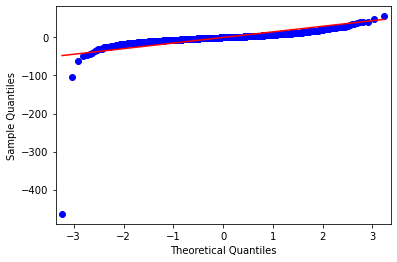

In [145]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_VWS.resid, line = 's')

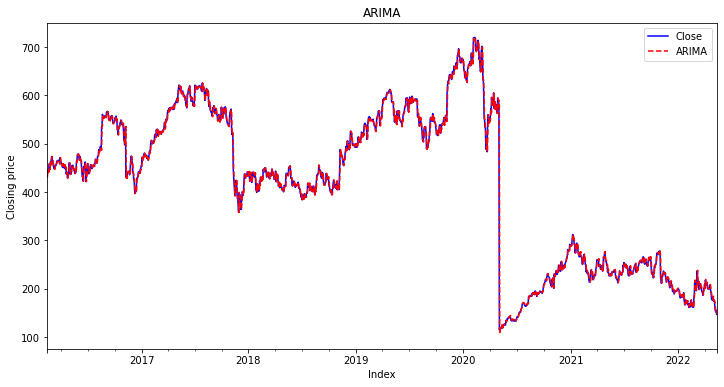

In [146]:
plot_models(VWS['Close'], VWS['ARIMA'], 'ARIMA')

Text(0, 0.5, 'Closing')

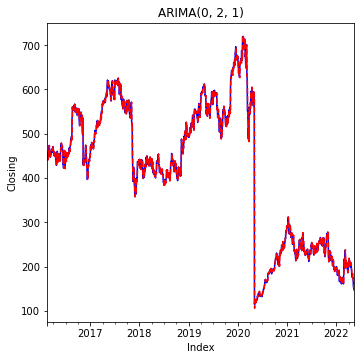

In [147]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
VWS['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
VWS['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0, 0.5, 'Forecasted value')

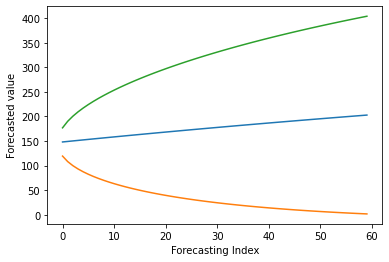

In [148]:
f, err, ci = arima_VWS.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

##### Validating the Forecast

In [149]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = arima_VWS.predict(start = start, end = end, dynamic = False, typ = 'levels')

In [150]:
# Create a dataframe to store r2 score
R_arima_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arima_VWS['Model'] = 'ARIMA'
R_arima_VWS.set_index(['Model'], inplace=True)
R_arima_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_arima_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_arima_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_arima_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
R_arima_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARIMA  0.107954            24.843527          867.488861   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARIMA                29.453164                       11.730382

### III.4.-SARIMA

#### A.- EDP Renováveis (0ML1.IL) 

In [151]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# 12 additional parameter means number of observations per year or the period
SARIMAX_EDPR = SARIMAX(EDPR['Close'], order = (2, 0, 2), seasonal_order = (2, 1, 0, 12)).fit()
#AutoSarima=3, 0, 2 **  2, 1, 0, 12 ***0.88 Score
#by hand=2, 0, 2 **  2, 0, 1, 12 *** 0.91 Score
# Display the summary of the model
print(SARIMAX_EDPR.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 2322
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                -179.242
Date:                             Sun, 15 May 2022   AIC                            372.483
Time:                                     14:42:27   BIC                            412.698
Sample:                                 01-04-2016   HQIC                           387.142
                                      - 05-13-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3125      1.094      0.286      0.775      -1.832       2.457
ar.L2          0.6285      

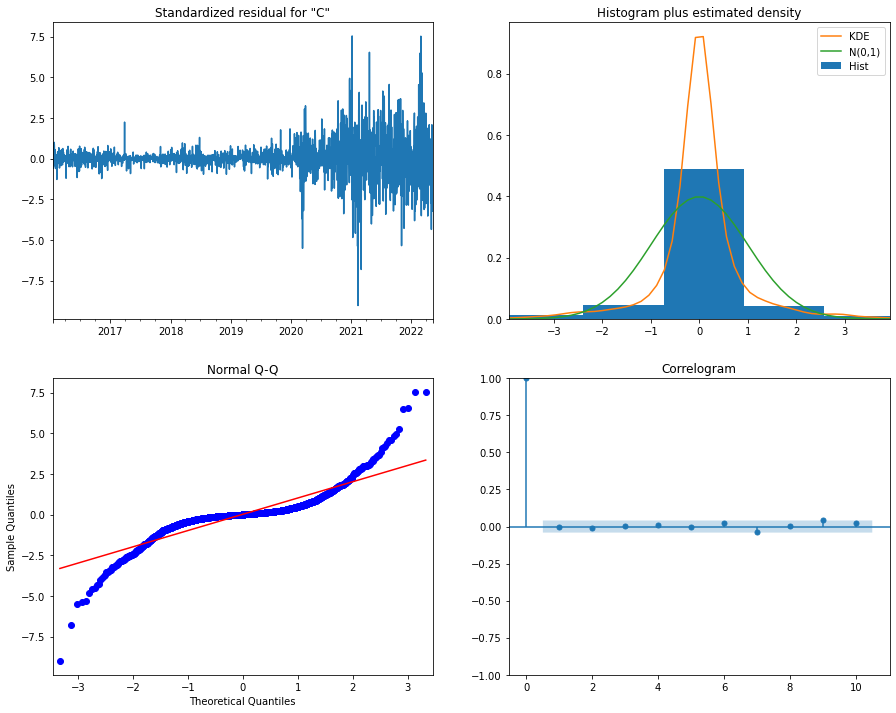

In [152]:
# Diagnosing the model residuals
SARIMAX_EDPR.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [153]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = SARIMAX_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

2021-05-30    19.590083
2021-05-31    19.506058
2021-06-01    19.574497
2021-06-02    19.539228
2021-06-03    18.498123
                ...    
2022-05-09    21.198579
2022-05-10    20.515354
2022-05-11    21.112338
2022-05-12    20.651747
2022-05-13    20.060194
Freq: D, Name: SARIMA Predictions, Length: 349, dtype: float64


In [154]:
# Create a dataframe to store r2 score
R_SARIMAX_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_EDPR['Model'] = 'SARIMA'
R_SARIMAX_EDPR.set_index(['Model'], inplace=True)
R_SARIMAX_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_SARIMAX_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_SARIMAX_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_SARIMAX_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_SARIMAX_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
SARIMA  0.927344             0.334569            0.201294   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
SARIMA                 0.448658                        1.591348

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [155]:
# 12 additional parameter means number of observations per year or the period
SARIMAX_VWS = SARIMAX(VWS['Close'], order = (0, 0,3),seasonal_order = (0, 1, 2, 12)).fit()#(AR,D,MA)#(p,d,q)
#AutoSarima=1, 0, 0 **  2, 1, 0, 12 ***	0.052546 Score
#by hand=0, 0, 3 **  0, 1, 2, 12 *** 0.34 Score
# Display the summary of the model
print(SARIMAX_VWS.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   Close   No. Observations:                 1630
Model:             SARIMAX(0, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -7327.714
Date:                                 Sun, 15 May 2022   AIC                          14667.427
Time:                                         14:42:32   BIC                          14699.761
Sample:                                     02-15-2016   HQIC                         14679.427
                                          - 05-13-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0633      0.009    118.360      0.000       1.046       1

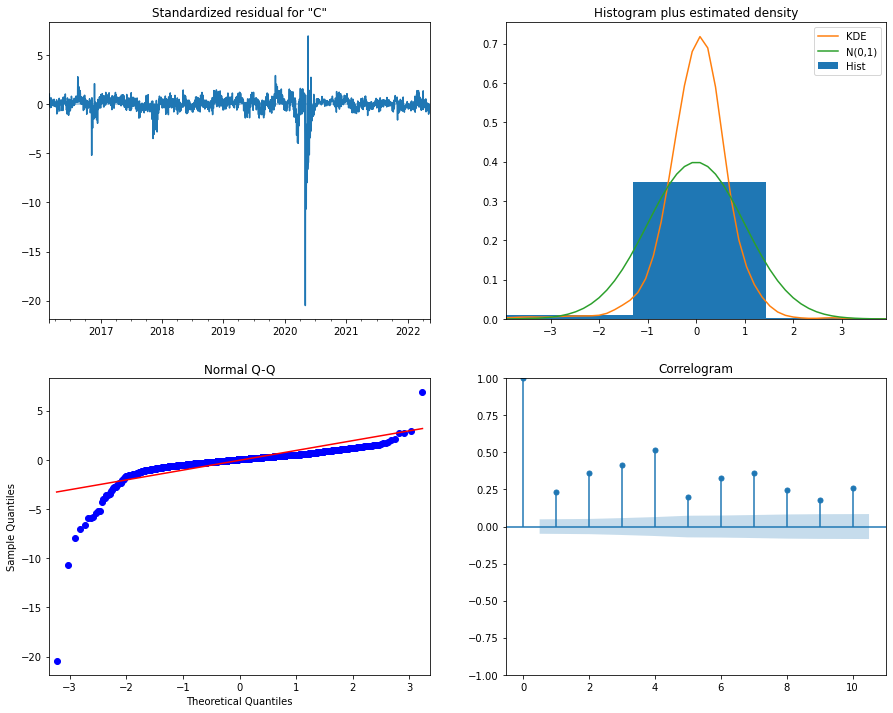

In [156]:
# Diagnosing the model residuals
SARIMAX_VWS.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [157]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = SARIMAX_VWS.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

2021-07-13    241.222714
2021-07-14    243.719274
2021-07-15    246.902451
2021-07-16    220.928096
2021-07-19    236.153997
                 ...    
2022-06-20    175.469542
2022-06-21    184.512861
2022-06-22    182.841899
2022-06-23    183.186107
2022-06-24    183.734713
Freq: B, Name: SARIMA Predictions, Length: 249, dtype: float64


https://stats.stackexchange.com/questions/299712/what-are-the-shortcomings-of-the-mean-absolute-percentage-error-mape

In [158]:
# Create a dataframe to store r2 score
R_SARIMAX_VWS= pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_VWS['Model'] = 'SARIMA'
R_SARIMAX_VWS.set_index(['Model'], inplace=True)
R_SARIMAX_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_SARIMAX_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_SARIMAX_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_SARIMAX_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100
# Display the results
R_SARIMAX_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
SARIMA  0.333549             21.14765           648.10479   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
SARIMA                25.457902                        3.854288

### III.5.-Keras

#### A.- EDP Renováveis (0ML1.IL) 

In [159]:
 """model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(train_A.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_A,train_A,epochs=100,batch_size=32)"""

"model = Sequential()\nmodel.add(LSTM(units=50,return_sequences=True,input_shape=(train_A.shape[1], 1)))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=50,return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=50,return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=50))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam',loss='mean_squared_error')\nmodel.fit(train_A,train_A,epochs=100,batch_size=32)"

In [160]:
"""total = pd.concat((train_A['Close'], test_A['Close']), axis = 0)
inputs = total[len(total) - len(test_A) - 60:].values
inputs = inputs.reshape(-1,1)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)"""

"total = pd.concat((train_A['Close'], test_A['Close']), axis = 0)\ninputs = total[len(total) - len(test_A) - 60:].values\ninputs = inputs.reshape(-1,1)\nX_test = []\nfor i in range(60, 76):\n    X_test.append(inputs[i-60:i, 0])\n    X_test = np.array(X_test)\n    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))\n    predicted_stock_price = model.predict(X_test)\n    predicted_stock_price = sc.inverse_transform(predicted_stock_price)"

https://www.thepythoncode.com/article/stock-price-prediction-in-python-using-tensorflow-2-and-keras

#### B.- Vestas Wind Systems A/S (VWS.CO)

### III.6.-Facebook Prophet

#### A.- EDP Renováveis (0ML1.IL) 

In [161]:
dataset_EDP = pd.read_csv('EDPR_df.csv')

In [162]:
dataset_EDP = dataset_EDP[['Unnamed: 0', 'Close']].rename(columns = {'Unnamed: 0': 'ds', 'Close': 'y'})
dataset_EDP.head()

ds        y
0  2016-01-04  7.13510
1  2016-01-05  7.30060
2  2016-01-06  7.21513
3  2016-01-07  7.21950
4  2016-01-08  7.19650

In [163]:
model = Prophet(daily_seasonality=True)
model.fit(dataset_EDP)

In [164]:
future_EDP = model.make_future_dataframe(periods=90) # With this line of code the model will make predictions for the next 90 days
preds_EDP = model.predict(future_EDP)

In [165]:
preds_EDP.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-04  7.094073    6.088912    8.686739     7.094073     7.094073   
1 2016-01-05  7.092447    6.099255    8.732546     7.092447     7.092447   
2 2016-01-06  7.090821    6.072526    8.738055     7.090821     7.090821   
3 2016-01-07  7.089195    6.089625    8.663890     7.089195     7.089195   
4 2016-01-08  7.087569    6.143235    8.722222     7.087569     7.087569   

   additive_terms  additive_terms_lower  additive_terms_upper    daily  ...  \
0        0.300921              0.300921              0.300921 -0.08924  ...   
1        0.306007              0.306007              0.306007 -0.08924  ...   
2        0.308834              0.308834              0.308834 -0.08924  ...   
3        0.306494              0.306494              0.306494 -0.08924  ...   
4        0.284133              0.284133              0.284133 -0.08924  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -0.012303     -0.012303     -0.012303  0.402464      0.402464      0.402464   
1 -0.006304     -0.006304     -0.006304  0.401551      0.401551      0.401551   
2  0.000345      0.000345      0.000345  0.397730      0.397730      0.397730   
3  0.004582      0.004582      0.004582  0.391152      0.391152      0.391152   
4 -0.008630     -0.008630     -0.008630  0.382003      0.382003      0.382003   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  7.394994  
1                         0.0  7.398454  
2                         0.0  7.399655  
3                         0.0  7.395689  
4                         0.0  7.371702  

[5 rows x 22 columns]

In [166]:
preds_EDP.tail(90)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1660 2022-05-14  21.898672   20.072124   22.701774    21.898672    21.898672   
1661 2022-05-15  21.902655   20.068345   22.755491    21.902655    21.902655   
1662 2022-05-16  21.906638   20.094201   22.665106    21.906638    21.906638   
1663 2022-05-17  21.910620   20.160245   22.623076    21.910620    21.910620   
1664 2022-05-18  21.914603   20.060943   22.765354    21.914603    21.914603   
...         ...        ...         ...         ...          ...          ...   
1745 2022-08-07  22.237194   21.061188   23.702616    22.076499    22.420756   
1746 2022-08-08  22.241176   20.933332   23.689129    22.075826    22.430137   
1747 2022-08-09  22.245159   21.024438   23.590982    22.074116    22.438607   
1748 2022-08-10  22.249141   20.966028   23.641052    22.069115    22.446973   
1749 2022-08-11  22.253124   20.931224   23.620364    22.068247    22.456478   

      additive_terms  additive_terms_lower  additive_terms_upper    daily  \
1660       -0.499880             -0.499880             -0.499880 -0.08924   
1661       -0.491657             -0.491657             -0.491657 -0.08924   
1662       -0.503158             -0.503158             -0.503158 -0.08924   
1663       -0.481909             -0.481909             -0.481909 -0.08924   
1664       -0.457218             -0.457218             -0.457218 -0.08924   
...              ...                   ...                   ...      ...   
1745        0.073750              0.073750              0.073750 -0.08924   
1746        0.048391              0.048391              0.048391 -0.08924   
1747        0.053951              0.053951              0.053951 -0.08924   
1748        0.061670              0.061670              0.061670 -0.08924   
1749        0.068519              0.068519              0.068519 -0.08924   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1660  ...  0.011155      0.011155      0.011155 -0.421795     -0.421795   
1661  ...  0.011155      0.011155      0.011155 -0.413572     -0.413572   
1662  ... -0.012303     -0.012303     -0.012303 -0.401615     -0.401615   
1663  ... -0.006304     -0.006304     -0.006304 -0.386365     -0.386365   
1664  ...  0.000345      0.000345      0.000345 -0.368323     -0.368323   
...   ...       ...           ...           ...       ...           ...   
1745  ...  0.011155      0.011155      0.011155  0.151835      0.151835   
1746  ... -0.012303     -0.012303     -0.012303  0.149934      0.149934   
1747  ... -0.006304     -0.006304     -0.006304  0.149494      0.149494   
1748  ...  0.000345      0.000345      0.000345  0.150565      0.150565   
1749  ...  0.004582      0.004582      0.004582  0.153177      0.153177   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1660     -0.421795                   0.0                         0.0   
1661     -0.413572                   0.0                         0.0   
1662     -0.401615                   0.0                         0.0   
1663     -0.386365                   0.0                         0.0   
1664     -0.368323                   0.0                         0.0   
...            ...                   ...                         ...   
1745      0.151835                   0.0                         0.0   
1746      0.149934                   0.0                         0.0   
1747      0.149494                   0.0                         0.0   
1748      0.150565                   0.0                         0.0   
1749      0.153177                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
1660                         0.0  21.398792  
1661                         0.0  21.410998  
1662                         0.0  21.403479  
1663                         0.0  21.428712  
1664                         0.0  21.457385  
...                          ...        ...  
1745                         0.0  22.31

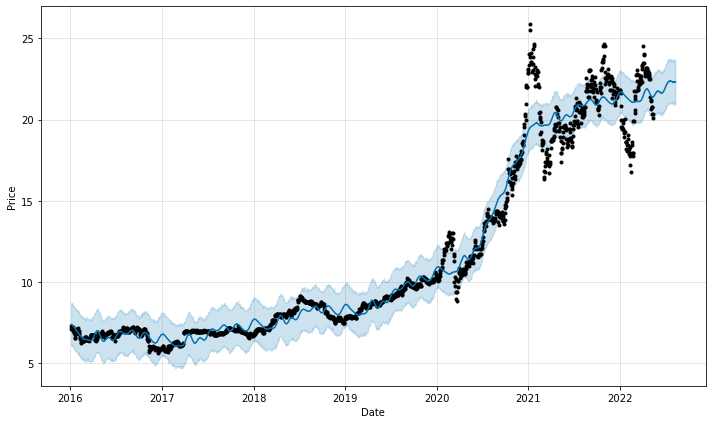

In [167]:
model.plot(preds_EDP, xlabel = 'Date', ylabel = 'Price');

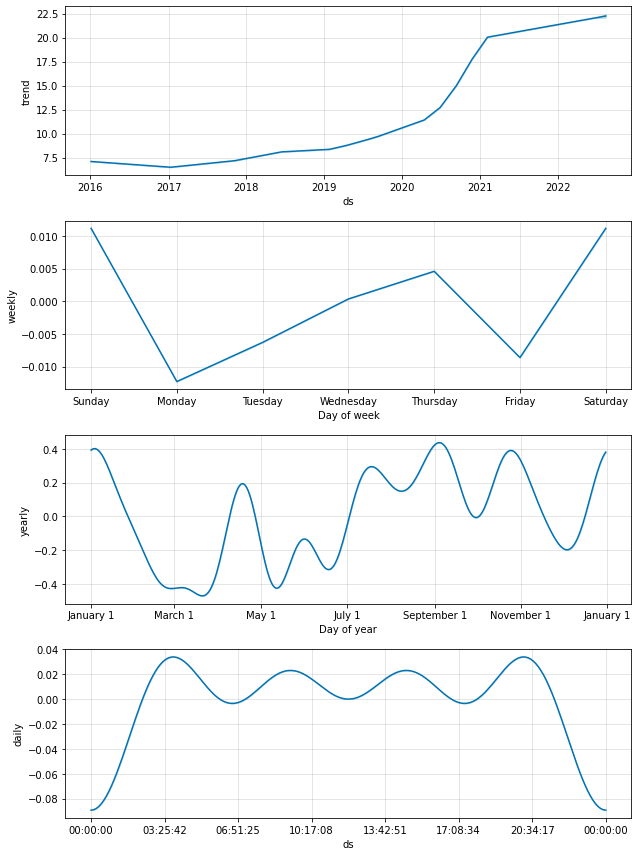

In [168]:
model.plot_components(preds_EDP);#shows the trend over the years, over one year and weekly 

In [169]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [170]:
plot_plotly(model, preds_EDP)

In [171]:
plot_components_plotly(model, preds_EDP)#shows the trend over the years, over one year and weekly 

##### Validating the Forecast

In [172]:
EDPR.info

<bound method DataFrame.info of                  High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2016-01-04   7.135100   7.135100   7.135100   7.135100        0.0   6.866567   
2016-01-05   7.300600   7.300600   7.300600   7.300600      150.0   7.025838   
2016-01-06   7.215130   7.136500   7.225800   7.215130     1331.0   6.943584   
2016-01-07   7.234500   7.125000   7.176000   7.219500    11142.0   6.947790   
2016-01-08   7.279000   7.196500   7.241650   7.196500    13085.0   6.925655   
...               ...        ...        ...        ...        ...        ...   
2022-05-09  21.059999  20.066990  20.775000  20.357500  1480535.0  20.357500   
2022-05-10  20.830000  20.070000  20.150000  20.785000   343846.0  20.785000   
2022-05-11  20.930000  20.270000  20.514999  20.760000   822720.0  20.760000   
2022-05-12  20.590000  19.940001  20.347500  20.120001  1814103.0  20.120001   
2022-05-

In [173]:
dataset_EDP.info

<bound method DataFrame.info of               ds          y
0     2016-01-04   7.135100
1     2016-01-05   7.300600
2     2016-01-06   7.215130
3     2016-01-07   7.219500
4     2016-01-08   7.196500
...          ...        ...
1655  2022-05-09  20.357500
1656  2022-05-10  20.785000
1657  2022-05-11  20.760000
1658  2022-05-12  20.120001
1659  2022-05-13  20.337500

[1660 rows x 2 columns]>

In [174]:
'''
# Python
cutoffs = pd.to_datetime(['2017-02-15', '2019-08-15', '2021-02-15'])
df_cv2 = cross_validation(preds_EDP,cutoffs=cutoffs, horizon='365 days')


df_p = performance_metrics(EDPR)
df_p.head()'''

"\n# Python\ncutoffs = pd.to_datetime(['2017-02-15', '2019-08-15', '2021-02-15'])\ndf_cv2 = cross_validation(preds_EDP,cutoffs=cutoffs, horizon='365 days')\n\n\ndf_p = performance_metrics(EDPR)\ndf_p.head()"

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [175]:
dataset_VWS = pd.read_csv('VWS_df.csv')

In [176]:
dataset_VWS = dataset_VWS[['Unnamed: 0', 'Close']].rename(columns = {'Unnamed: 0': 'ds', 'Close': 'y'})
dataset_VWS

ds           y
0     2016-01-04  475.468903
1     2016-01-05  475.200012
2     2016-01-06  468.399994
3     2016-01-07  460.307312
4     2016-01-08  458.308014
...          ...         ...
1655  2022-05-09  154.350006
1656  2022-05-10  152.490005
1657  2022-05-11  155.229996
1658  2022-05-12  147.080002
1659  2022-05-13  147.080002

[1660 rows x 2 columns]

In [177]:
model = Prophet(daily_seasonality=True)
model.fit(dataset_VWS)

In [178]:
future_VWS = model.make_future_dataframe(periods=90) # With this line of code the model will make predictions for the next 90 days
preds_VWS = model.predict(future_VWS)

In [179]:
preds_VWS.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-04  449.094292  365.057721  479.461125   449.094292   449.094292   
1 2016-01-05  449.371575  358.160259  481.630999   449.371575   449.371575   
2 2016-01-06  449.648858  356.860194  483.458257   449.648858   449.648858   
3 2016-01-07  449.926141  364.576238  482.488569   449.926141   449.926141   
4 2016-01-08  450.203424  360.407513  485.983123   450.203424   450.203424   

   additive_terms  additive_terms_lower  additive_terms_upper   daily  ...  \
0      -28.750013            -28.750013            -28.750013 -26.713  ...   
1      -27.294440            -27.294440            -27.294440 -26.713  ...   
2      -27.118882            -27.118882            -27.118882 -26.713  ...   
3      -27.170074            -27.170074            -27.170074 -26.713  ...   
4      -27.078981            -27.078981            -27.078981 -26.713  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -2.152638     -2.152638     -2.152638  0.115624      0.115624      0.115624   
1 -1.010643     -1.010643     -1.010643  0.429202      0.429202      0.429202   
2 -1.061113     -1.061113     -1.061113  0.655231      0.655231      0.655231   
3 -1.248942     -1.248942     -1.248942  0.791867      0.791867      0.791867   
4 -1.204914     -1.204914     -1.204914  0.838933      0.838933      0.838933   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  420.344279  
1                         0.0  422.077135  
2                         0.0  422.529976  
3                         0.0  422.756067  
4                         0.0  423.124443  

[5 rows x 22 columns]

In [180]:
preds_VWS.tail(90)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1660 2022-05-14  216.134284  103.256265  230.308756   216.134284   216.134284   
1661 2022-05-15  216.000913  103.556156  228.952259   216.000913   216.000913   
1662 2022-05-16  215.867541   98.308320  218.474303   215.867541   215.867541   
1663 2022-05-17  215.734170   96.288544  223.316691   215.734170   215.734170   
1664 2022-05-18  215.600798   98.023956  222.662933   215.600798   215.600798   
...         ...         ...         ...         ...          ...          ...   
1745 2022-08-07  204.797705  103.607984  239.952916   184.278356   224.304239   
1746 2022-08-08  204.664334  100.138735  232.185464   183.519776   224.714557   
1747 2022-08-09  204.530962  103.932136  240.394136   183.067372   225.459050   
1748 2022-08-10  204.397590   97.633314  243.759843   182.651863   225.824727   
1749 2022-08-11  204.264219  103.403312  235.812127   181.930112   226.334866   

      additive_terms  additive_terms_lower  additive_terms_upper   daily  ...  \
1660      -48.471894            -48.471894            -48.471894 -26.713  ...   
1661      -49.780626            -49.780626            -49.780626 -26.713  ...   
1662      -56.274082            -56.274082            -56.274082 -26.713  ...   
1663      -55.833984            -55.833984            -55.833984 -26.713  ...   
1664      -56.298459            -56.298459            -56.298459 -26.713  ...   
...              ...                   ...                   ...     ...  ...   
1745      -29.956638            -29.956638            -29.956638 -26.713  ...   
1746      -35.170572            -35.170572            -35.170572 -26.713  ...   
1747      -33.697221            -33.697221            -33.697221 -26.713  ...   
1748      -33.369152            -33.369152            -33.369152 -26.713  ...   
1749      -33.138033            -33.138033            -33.138033 -26.713  ...   

        weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1660  3.339125      3.339125      3.339125 -25.098019    -25.098019   
1661  3.339124      3.339124      3.339124 -26.406751    -26.406751   
1662 -2.152638     -2.152638     -2.152638 -27.408445    -27.408445   
1663 -1.010643     -1.010643     -1.010643 -28.110341    -28.110341   
1664 -1.061113     -1.061113     -1.061113 -28.524346    -28.524346   
...        ...           ...           ...        ...           ...   
1745  3.339124      3.339124      3.339124  -6.582763     -6.582763   
1746 -2.152638     -2.152638     -2.152638  -6.304935     -6.304935   
1747 -1.010643     -1.010643     -1.010643  -5.973579     -5.973579   
1748 -1.061113     -1.061113     -1.061113  -5.595039     -5.595039   
1749 -1.248942     -1.248942     -1.248942  -5.176092     -5.176092   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1660    -25.098019                   0.0                         0.0   
1661    -26.406751                   0.0                         0.0   
1662    -27.408445                   0.0                         0.0   
1663    -28.110341                   0.0                         0.0   
1664    -28.524346                   0.0                         0.0   
...            ...                   ...                         ...   
1745     -6.582763                   0.0                         0.0   
1746     -6.304935                   0.0                         0.0   
1747     -5.973579                   0.0                         0.0   
1748     -5.595039                   0.0                         0.0   
1749     -5.176092                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1660                         0.0  167.662391  
1661                         0.0  166.220286  
1662                         0.0  159.593459  
1663                         0.0  159.900186  
1664                         0.0  159.302340  
...                          ...         ...  
1745                

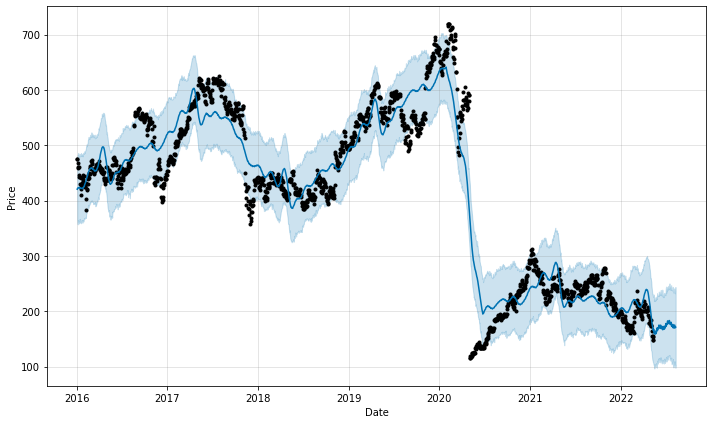

In [181]:
model.plot(preds_VWS, xlabel = 'Date', ylabel = 'Price');

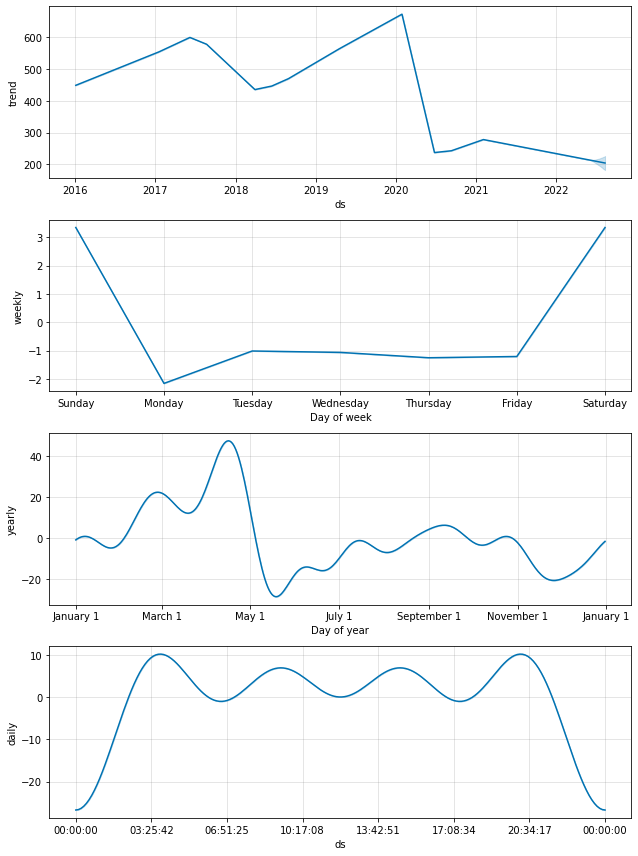

In [182]:
model.plot_components(preds_VWS);#shows the trend over the years, over one year and weekly 

In [183]:
plot_plotly(model, preds_VWS)

## Summary

In [184]:
Validation_EDPR= pd.concat([MA_SES_EDPR, MA_HoltWinters_EDPR,R_arma_EDPR,R_arima_EDPR,R_SARIMAX_EDPR])
Validation_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES           0.940625             0.262672            0.164499   
MA_Holt-Winters  0.941345             0.265145            0.162505   
ARMA             0.940626             0.263420            0.164498   
ARIMA            0.940844             0.266744            0.163892   
SARIMA           0.927344             0.334569            0.201294   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                          0.405584                        1.251916  
MA_Holt-Winters                 0.403119                        1.264147  
ARMA                            0.405583                        1.255356  
ARIMA                           0.404836                        1.270736  
SARIMA                          0.448658                        1.591348

In [185]:
Validation_VWS= pd.concat([MA_SES_VWS, MA_HoltWinters_VWS,R_arma_VWS,R_arima_VWS,R_SARIMAX_VWS])
Validation_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES           0.936332             5.692954           61.914973   
MA_Holt-Winters  0.936332             5.692954           61.914973   
ARMA             0.107261            24.847945          868.163124   
ARIMA            0.107954            24.843527          867.488861   
SARIMA           0.333549            21.147650          648.104790   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                          7.868607                        2.639422  
MA_Holt-Winters                 7.868607                        2.639422  
ARMA                           29.464608                       11.728323  
ARIMA                          29.453164                       11.730382  
SARIMA                         25.457902                        3.854288

## Complementary Reading

Reference: Efstathopoulos g. (2020) Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib 
Available at: URL <a href="https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ ">https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ </a>(Accessed 14 October 2021).  

Reference: Witham, J. (2020) The Imperative For A 24/7 Renewable Energy World, Forbes. 
Available at: URL <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo">https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo/ </a>(Accessed 14 October 2021).  

Reference: Norris, E. (2021) "Why Did My Stock's Ticker Change?", Investopedia. 
Available at: URL <a href="https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/">https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/ </a>(Accessed 14 October 2021).  

Reference: Mahgoub, A. (2021) "Stock Prediction using Regression Algorithm in Python", Medium. 
Available at: URL <a href="https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9/">https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9</a>(Accessed 25 Feb 2022). 

Reference: Prabhakaran, S. (2019) "Augmented Dickey Fuller Test (ADF Test) – Must Read Guide", Medium. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.">https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.</a>

Reference: Masum, M. (2020) "Time Series Analysis: Identifying AR and MA using ACF and PACF Plots", Medium. 
Available at: URL <a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</a> (Accessed 21 March 2022).  

Reference: Zvornicanin E. (2021) "Choosing the best q and p from ACF and PACF plots in ARMA-type modeling", Baeldung. 
Available at: URL <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</a> (Accessed 21 March 2022). 


Reference: Prabhakaran S. (2021) "ARIMA Model – Complete Guide to Time Series Forecasting in Python", Machinelearningplus. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/">https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/</a> (Accessed 21 March 2022). 

Reference: Daitan (2019) "A Visual Guide to Time Series Decomposition Analysis", Betterprogramming 
Available at: URL <a href="https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930">https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930</a> (Accessed 14 April 2022).

Reference: Zach (2021) "Augmented Dickey-Fuller Test in Python (With Example)", Statology.org 
Available at: URL <a href="https://www.statology.org/dickey-fuller-test-python/">https://www.statology.org/dickey-fuller-test-python/</a> (Accessed 14 April 2022).

Reference: Shao, V.(2020) "Forecasting with a Time Series Model using Python: Part One", Bounteous
Available at: URL <a href="https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/">https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/</a> (Accessed 15 April 2022).
